In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.special import inv_boxcox
import os #we will use the function listdir to list files in a folder
import math #to apply absolute value

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Day 1 - Mission statement:

# Exploring the data
# Data cleaning
    # checking for null values
    # uniformizing column names and figuring out what the column names even meeeaaaaaaaaaaan
# checking the multicollinearity
# 
#
#

In [3]:
path = ('C:/Users/camil/Documents/Courses/Ironhack/Module 1/Week 6/data_mid_bootcamp_project_FIFA_MoneyBall/')
file = os.listdir(path)
file

['.git',
 '.ipynb_checkpoints',
 'acronyms.csv',
 'data_mid_bootcamp_project_FIFA_MoneyBall',
 'FIFA project - exploring the data (num version).ipynb',
 'FIFA project - Modeling and Evaluation.ipynb',
 'FIFA-project',
 'fifa21_male2.csv',
 'positions - Copy.csv',
 'positions.csv',
 'project_details.md']

In [4]:
data = pd.DataFrame()
for file in file:
    if file.endswith('2.csv'):
        data = pd.read_csv(path + file)       
data.head()

ID         Name  Age  OVA            Nationality           Club  BOV   BP  \
0   2  G. Pasquale   33   69                  Italy        Udinese   71  LWB   
1  16  Luis García   37   71                  Spain      KAS Eupen   70   CM   
2  27      J. Cole   33   71                England  Coventry City   71  CAM   
3  36     D. Yorke   36   68  Trinidad &amp; Tobago     Sunderland   70   ST   
4  41      Iniesta   36   81                  Spain    Vissel Kobe   82  CAM   

       Position                                       Player Photo  ...  \
0            LM  https://cdn.sofifa.com/players/000/002/16_120.png  ...   
1    CM CAM CDM  https://cdn.sofifa.com/players/000/016/19_120.png  ...   
2  CAM RM RW LM  https://cdn.sofifa.com/players/000/027/16_120.png  ...   
3           NaN  https://cdn.sofifa.com/players/000/036/09_120.png  ...   
4        CM CAM  https://cdn.sofifa.com/players/000/041/20_120.png  ...   

     CDM    RDM    RWB     LB   LCB    CB   RCB     RB    GK Gender  
0  70+-1  70+-1  71+-2  70+-1  69+0  69+0  69+0  70+-1  17+0   Male  
1   66+1   66+1   62+1   60+1  60+1  60+1  60+1   60+1  17+1   Male  
2   54+0   54+0   52+0   47+0  46+0  46+0  46+0   47+0  15+0   Male  
3   65+0   65+0   56+0   57+0  51+0  51+0  51+0   57+0  22+0   Male  
4   73+3   73+3   70+3   67+3  64+3  64+3  64+3   67+3  17+3   Male  

[5 rows x 107 columns]

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
data.shape

(17125, 107)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17125 entries, 0 to 17124
Columns: 107 entries, ID to Gender
dtypes: float64(10), int64(45), object(52)
memory usage: 14.0+ MB


In [8]:
data.describe()

ID           Age           OVA           BOV           POT  \
count   17125.000000  17125.000000  17125.000000  17125.000000  17125.000000   
mean   219388.716204     25.272934     66.965022     67.900204     72.489810   
std     37499.197507      4.942665      6.864329      6.637538      5.769949   
min         2.000000     16.000000     38.000000     42.000000     47.000000   
25%    204082.000000     21.000000     62.000000     64.000000     69.000000   
50%    228961.000000     25.000000     67.000000     68.000000     72.000000   
75%    243911.000000     29.000000     72.000000     72.000000     76.000000   
max    259105.000000     53.000000     93.000000     93.000000     95.000000   

             Growth     Attacking      Crossing     Finishing  \
count  17125.000000  17125.000000  17125.000000  17125.000000   
mean       5.524788    258.537752     51.621314     47.956672   
std        5.787539     72.255687     17.875715     19.391547   
min       -1.000000     33.000000      6.000000      3.000000   
25%        0.000000    232.000000     41.000000     33.000000   
50%        4.000000    271.000000     56.000000     52.000000   
75%        9.000000    306.000000     65.000000     64.000000   
max       26.000000    437.000000     94.000000     95.000000   

       Heading Accuracy  Short Passing       Volleys         Skill  \
count      17125.000000   17125.000000  17067.000000  17125.000000   
mean          53.598832      60.507620     45.005742    266.607591   
std           16.947164      13.960635     17.729483     76.809344   
min            5.000000       7.000000      4.000000     43.000000   
25%           46.000000      56.000000     32.000000    232.000000   
50%           57.000000      63.000000     46.000000    279.000000   
75%           65.000000      69.000000     59.000000    319.000000   
max           93.000000      94.000000     90.000000    470.000000   

          Dribbling         Curve   FK Accuracy  Long Passing  Ball Control  \
count  17125.000000  17067.000000  17125.000000  17125.000000  17125.000000   
mean      57.846423     49.574676     44.387270     54.324321     60.642803   
std       18.047250     18.188344     17.504128     14.856911     15.873647   
min        5.000000      4.000000      5.000000      9.000000      5.000000   
25%       53.000000     37.000000     32.000000     45.000000     57.000000   
50%       63.000000     51.000000     43.000000     57.000000     64.000000   
75%       70.000000     64.000000     58.000000     65.000000     70.000000   
max       96.000000     94.000000     94.000000     93.000000     96.000000   

           Movement  Acceleration  Sprint Speed       Agility     Reactions  \
count  17125.000000  17125.000000  17125.000000  17067.000000  17125.000000   
mean     322.693664     65.445898     65.443036     64.602273     62.924847   
std       54.933593     14.657889     14.437377     14.372443      9.037279   
min      113.000000     12.000000     11.000000     14.000000     24.000000   
25%      294.000000     58.000000     59.000000     57.000000     57.000000   
50%      331.000000     68.000000     68.000000     67.000000     63.000000   
75%      360.000000     75.000000     75.000000     75.000000     69.000000   
max      464.000000     97.000000     96.000000     96.000000     96.000000   

            Balance         Power    Shot Power       Jumping       Stamina  \
count  17067.000000  17125.000000  17125.000000  17067.000000  17125.000000   
mean      64.715591    302.414774     59.711416     65.170212     63.309606   
std       14.031563     49.380576     13.417931     11.918063     15.313272   
min       17.000000    128.000000     12.000000     22.000000     11.000000   
25%       57.000000    272.000000     50.000000     58.000000     56.000000   
50%       67.000000    308.000000     61.000000     66.000000     66.000000   
75%       75.000000    339.000000     70.000000     73.000000     73.000000   
max       97.000000    4

In [9]:
data.columns = [column.lower().replace(" ", "_").replace("&","and") for column in data.columns] 
data.head()

id         name  age  ova            nationality           club  bov   bp  \
0   2  G. Pasquale   33   69                  Italy        Udinese   71  LWB   
1  16  Luis García   37   71                  Spain      KAS Eupen   70   CM   
2  27      J. Cole   33   71                England  Coventry City   71  CAM   
3  36     D. Yorke   36   68  Trinidad &amp; Tobago     Sunderland   70   ST   
4  41      Iniesta   36   81                  Spain    Vissel Kobe   82  CAM   

       position                                       player_photo  \
0            LM  https://cdn.sofifa.com/players/000/002/16_120.png   
1    CM CAM CDM  https://cdn.sofifa.com/players/000/016/19_120.png   
2  CAM RM RW LM  https://cdn.sofifa.com/players/000/027/16_120.png   
3           NaN  https://cdn.sofifa.com/players/000/036/09_120.png   
4        CM CAM  https://cdn.sofifa.com/players/000/041/20_120.png   

                                          club_logo  \
0      https://cdn.sofifa.com/teams/55/light_60.png   
1    https://cdn.sofifa.com/teams/2013/light_60.png   
2    https://cdn.sofifa.com/teams/1800/light_60.png   
3     https://cdn.sofifa.com/teams/106/light_60.png   
4  https://cdn.sofifa.com/teams/101146/light_60.png   

                                flag_photo  pot          team_and_contract  \
0      https://cdn.sofifa.com/flags/it.png   69        Udinese 2008 ~ 2016   
1      https://cdn.sofifa.com/flags/es.png   71      KAS Eupen 2014 ~ 2019   
2  https://cdn.sofifa.com/flags/gb-eng.png   71  Coventry City 2016 ~ 2020   
3      https://cdn.sofifa.com/flags/tt.png   82            Sunderland 2009   
4      https://cdn.sofifa.com/flags/es.png   81    Vissel Kobe 2018 ~ 2021   

  height  weight   foot  growth        joined loan_date_end  value  wage  \
0   6'0"  181lbs   Left       0   Jul 1, 2008           NaN  €625K   €7K   
1  5'10"  143lbs  Right       0  Jul 19, 2014           NaN  €600K   €7K   
2   5'9"  161lbs  Right       0   Jan 7, 2016           NaN  €1.1M  €15K   
3  5'11"  165lbs  Right      14           NaN           NaN     €0    €0   
4   5'7"  150lbs  Right       0  Jul 16, 2018           NaN  €5.5M  €12K   

  release_clause     contract  attacking  crossing  finishing  \
0             €0  2008 ~ 2016        313        75         50   
1          €1.1M  2014 ~ 2019        337        68         64   
2             €0  2016 ~ 2020        337        80         64   
3             €0         2009        264        54         70   
4          €7.2M  2018 ~ 2021        367        75         69   

   heading_accuracy  short_passing  volleys  skill  dribbling  curve  \
0                59             71     58.0    338         73   65.0   
1                61             76     68.0    369         69   79.0   
2                41             77     75.0    387         79   84.0   
3                60             80      NaN    255         68    NaN   
4                54             90     79.0    408         85   80.0   

   fk_accuracy  long_passing  ball_control  movement  acceleration  \
0           60            69            71       347            68   
1           79            71            71       305            56   
2           77            69            78       295            48   
3           46            64            77       176            59   
4           70            83            90       346            61   

   sprint_speed  agility  reactions  balance  power  shot_power  jumping  \
0            74     68.0         69     68.0    347          74     68.0   
1            50     62.0         65     72.0    324          75     54.0   
2            42     71.0         59     75.0    284          72     58.0   
3            62      NaN         55      NaN    239          63      NaN   
4            56     79.0         75     75.0    297          67     40.0   

   stamina  strength  long_shots  mentality  aggression  interceptions  \
0       69        68          68        320          72           69

In [10]:
for col_name in data.columns: 
    print(col_name)

id
name
age
ova
nationality
club
bov
bp
position
player_photo
club_logo
flag_photo
pot
team_and_contract
height
weight
foot
growth
joined
loan_date_end
value
wage
release_clause
contract
attacking
crossing
finishing
heading_accuracy
short_passing
volleys
skill
dribbling
curve
fk_accuracy
long_passing
ball_control
movement
acceleration
sprint_speed
agility
reactions
balance
power
shot_power
jumping
stamina
strength
long_shots
mentality
aggression
interceptions
positioning
vision
penalties
composure
defending
marking
standing_tackle
sliding_tackle
goalkeeping
gk_diving
gk_handling
gk_kicking
gk_positioning
gk_reflexes
total_stats
base_stats
w/f
sm
a/w
d/w
ir
pac
sho
pas
dri
def
phy
hits
ls
st
rs
lw
lf
cf
rf
rw
lam
cam
ram
lm
lcm
cm
rcm
rm
lwb
ldm
cdm
rdm
rwb
lb
lcb
cb
rcb
rb
gk
gender


In [11]:
for col in data.columns:
    if data[col].isna().sum() > 0:
        print(col, ": ", data[col].isna().sum(), "NaN")

club :  23 NaN
position :  413 NaN
club_logo :  23 NaN
joined :  58 NaN
loan_date_end :  16215 NaN
volleys :  58 NaN
curve :  58 NaN
agility :  58 NaN
balance :  58 NaN
jumping :  58 NaN
interceptions :  7 NaN
positioning :  7 NaN
vision :  58 NaN
composure :  423 NaN
sliding_tackle :  58 NaN
a/w :  89 NaN
d/w :  89 NaN


In [12]:
data[data.columns[data.isna().any()]]

club      position  \
0            Udinese            LM   
1          KAS Eupen    CM CAM CDM   
2      Coventry City  CAM RM RW LM   
3         Sunderland           NaN   
4        Vissel Kobe        CM CAM   
...              ...           ...   
17120     CD Tondela            CB   
17121        Burnley        CAM CM   
17122        Burnley            RB   
17123  SK Sturm Graz         RB LB   
17124          Lecce            ST   

                                              club_logo        joined  \
0          https://cdn.sofifa.com/teams/55/light_60.png   Jul 1, 2008   
1        https://cdn.sofifa.com/teams/2013/light_60.png  Jul 19, 2014   
2        https://cdn.sofifa.com/teams/1800/light_60.png   Jan 7, 2016   
3         https://cdn.sofifa.com/teams/106/light_60.png           NaN   
4      https://cdn.sofifa.com/teams/101146/light_60.png  Jul 16, 2018   
...                                                 ...           ...   
17120  https://cdn.sofifa.com/teams/112516/light_60.png  Sep 29, 2020   
17121    https://cdn.sofifa.com/teams/1796/light_60.png  Aug 20, 2020   
17122    https://cdn.sofifa.com/teams/1796/light_60.png  Aug 20, 2020   
17123     https://cdn.sofifa.com/teams/209/light_60.png  Sep 30, 2020   
17124     https://cdn.sofifa.com/teams/347/light_60.png  Sep 30, 2020   

      loan_date_end  volleys  curve  agility  balance  jumping  interceptions  \
0               NaN     58.0   65.0     68.0     68.0     68.0           69.0   
1               NaN     68.0   79.0     62.0     72.0     54.0           71.0   
2               NaN     75.0   84.0     71.0     75.0     58.0           39.0   
3               NaN      NaN    NaN      NaN      NaN      NaN           70.0   
4               NaN     79.0   80.0     79.0     75.0     40.0           70.0   
...             ...      ...    ...      ...      ...      ...            ...   
17120  Jun 30, 2021     26.0   26.0     46.0     42.0     70.0           58.0   
17121           NaN     41.0   42.0     52.0     68.0     62.0           50.0   
17122           NaN     34.0   43.0     54.0     68.0     61.0           55.0   
17123           NaN     23.0   43.0     74.0     77.0     72.0           58.0   
17124           NaN     54.0   45.0     59.0     65.0     62.0           11.0   

       positioning  vision  composure  sliding_tackle     a/w     d/w  
0             63.0    66.0        NaN            69.0  Medium    High  
1             72.0    73.0       79.0            40.0  Medium  Medium  
2             69.0    74.0        NaN            30.0  Medium     Low  
3             72.0     NaN        NaN             NaN     NaN     NaN  
4             78.0    93.0       89.0            56.0    High  Medium  
...            ...     ...        ...             ...     ...     ...  
17120         23.0    29.0       46.0            66.0  Medium  Medium  
17121         55.0    53.0       46.0            56.0  Medium  Medium  
17122         49.0    45.0       43.0            54.0  Medium  Medium  
17123         46.0    56.0       54.0            61.0    High  Medium  
17124         64.0    50.0       57.0            11.0    High  Medium  

[17125 rows x 17 columns]

In [13]:
round((data["loan_date_end"].isna().sum())/(len(data["loan_date_end"]))*100,0) # we can drop that column

95.0

In [14]:
# Are there other columns that can be dropped?
# # player_photo, club_logo, flag_photo, they are photo we don't need 
# # gender: should only be one unique value:
data['gender'].unique()

array(['Male'], dtype=object)

In [15]:
data = data.drop(["loan_date_end", "player_photo", "club_logo", "flag_photo", "gender","team_and_contract"], axis=1)

In [16]:
data.shape

(17125, 101)

In [17]:
# Setting ID as the index but first checking that there are only unique values there
print(data.id.nunique())
print(len(data.id))

17125
17125


In [18]:
data = data.set_index('id')
data.head()

name  age  ova            nationality           club  bov   bp  \
id                                                                          
2   G. Pasquale   33   69                  Italy        Udinese   71  LWB   
16  Luis García   37   71                  Spain      KAS Eupen   70   CM   
27      J. Cole   33   71                England  Coventry City   71  CAM   
36     D. Yorke   36   68  Trinidad &amp; Tobago     Sunderland   70   ST   
41      Iniesta   36   81                  Spain    Vissel Kobe   82  CAM   

        position  pot height  weight   foot  growth        joined  value  \
id                                                                         
2             LM   69   6'0"  181lbs   Left       0   Jul 1, 2008  €625K   
16    CM CAM CDM   71  5'10"  143lbs  Right       0  Jul 19, 2014  €600K   
27  CAM RM RW LM   71   5'9"  161lbs  Right       0   Jan 7, 2016  €1.1M   
36           NaN   82  5'11"  165lbs  Right      14           NaN     €0   
41        CM CAM   81   5'7"  150lbs  Right       0  Jul 16, 2018  €5.5M   

    wage release_clause     contract  attacking  crossing  finishing  \
id                                                                     
2    €7K             €0  2008 ~ 2016        313        75         50   
16   €7K          €1.1M  2014 ~ 2019        337        68         64   
27  €15K             €0  2016 ~ 2020        337        80         64   
36    €0             €0         2009        264        54         70   
41  €12K          €7.2M  2018 ~ 2021        367        75         69   

    heading_accuracy  short_passing  volleys  skill  dribbling  curve  \
id                                                                      
2                 59             71     58.0    338         73   65.0   
16                61             76     68.0    369         69   79.0   
27                41             77     75.0    387         79   84.0   
36                60             80      NaN    255         68    NaN   
41                54             90     79.0    408         85   80.0   

    fk_accuracy  long_passing  ball_control  movement  acceleration  \
id                                                                    
2            60            69            71       347            68   
16           79            71            71       305            56   
27           77            69            78       295            48   
36           46            64            77       176            59   
41           70            83            90       346            61   

    sprint_speed  agility  reactions  balance  power  shot_power  jumping  \
id                                                                          
2             74     68.0         69     68.0    347          74     68.0   
16            50     62.0         65     72.0    324          75     54.0   
27            42     71.0         59     75.0    284          72     58.0   
36            62      NaN         55      NaN    239          63      NaN   
41            56     79.0         75     75.0    297          67     40.0   

    stamina  strength  long_shots  mentality  aggression  interceptions  \
id                                                                        
2        69        68          68        320          72           69.0   
16       64        60          71        362          71           71.0   
27       29        56          69        317          69           39.0   
36       51        66          59        271          59           70.0   
41       58        62          70        370          58           70.0   

    positioning  vision  penalties  composure  defending  marking  \
id                                                                  
2          63.0    66.0         50        NaN        208       70   
16         72.0    73.0         75       79.0        153       70   
27         69.0    74.0         66        NaN         99       35   
36         7

In [19]:
# We want to rename the positions to make it more readable for us, as football laypersons
# So we get a csv file that we created and will turn into a dictionary
positions = pd.read_csv('C:/Users/camil/Documents/Courses/Ironhack/Module 1/Week 6/data_mid_bootcamp_project_FIFA_MoneyBall/positions.csv', header=None, index_col=0)
positions

1
0                              
ova               overall_score
bov                best_overall
bp                best_position
pot             potential_score
foot             preferred_foot
w/f                   weak_foot
sm                  skill_moves
a/w                    away_win
d/w                  draw_games
ir     international_reputation
pac                        pace
sho                    shooting
pas                     passing
dri                     dribble
def                      defend
phy                    physical
hits                       hits
ls                 left_striker
st                      striker
rs                right_striker
lw                  left_winger
lf                 left_forward
cf               center_forward
rf                right_forward
rw                 right_winger
lam     left_attacking_midfield
cam   center_attacking_midfield
ram    right_attacking_midfield
lm              left_midfielder
lcm        left_center_midfield
cm              center_midfield
rcm       right_center_midfield
rm             right_midfielder
lwb              left_wing_back
ldm     left_defensive_midfield
cdm   center_defensive_midfield
rdm    right_defensive_midfield
rwb             right_wing_back
lb                    left_back
lcb            left_center_back
cb                  center_back
rcb           right_center_back
rb                   right_back
gk                   goalkeeper

In [20]:
positions = positions.squeeze().to_dict()

In [21]:
positions

{'ova': 'overall_score',
 'bov': 'best_overall',
 'bp': 'best_position',
 'pot': 'potential_score',
 'foot': 'preferred_foot',
 'w/f': 'weak_foot',
 'sm': 'skill_moves',
 'a/w': 'away_win',
 'd/w': 'draw_games',
 'ir': 'international_reputation',
 'pac': 'pace',
 'sho': 'shooting',
 'pas': 'passing',
 'dri': 'dribble',
 'def': 'defend',
 'phy': 'physical',
 'hits': 'hits',
 'ls': 'left_striker',
 'st': 'striker',
 'rs': 'right_striker',
 'lw': 'left_winger',
 'lf': 'left_forward',
 'cf': 'center_forward',
 'rf': 'right_forward',
 'rw': 'right_winger',
 'lam': 'left_attacking_midfield',
 'cam': 'center_attacking_midfield',
 'ram': 'right_attacking_midfield',
 'lm': 'left_midfielder',
 'lcm': 'left_center_midfield',
 'cm': 'center_midfield',
 'rcm': 'right_center_midfield',
 'rm': 'right_midfielder',
 'lwb': 'left_wing_back',
 'ldm': 'left_defensive_midfield',
 'cdm': 'center_defensive_midfield',
 'rdm': 'right_defensive_midfield',
 'rwb': 'right_wing_back',
 'lb': 'left_back',
 'lcb': '

In [22]:
for column in data:
    if column in positions:
        data.rename(columns=positions, inplace=True)
data.head()

name  age  overall_score            nationality           club  \
id                                                                          
2   G. Pasquale   33             69                  Italy        Udinese   
16  Luis García   37             71                  Spain      KAS Eupen   
27      J. Cole   33             71                England  Coventry City   
36     D. Yorke   36             68  Trinidad &amp; Tobago     Sunderland   
41      Iniesta   36             81                  Spain    Vissel Kobe   

    best_overall best_position      position  potential_score height  weight  \
id                                                                             
2             71           LWB            LM               69   6'0"  181lbs   
16            70            CM    CM CAM CDM               71  5'10"  143lbs   
27            71           CAM  CAM RM RW LM               71   5'9"  161lbs   
36            70            ST           NaN               82  5'11"  165lbs   
41            82           CAM        CM CAM               81   5'7"  150lbs   

   preferred_foot  growth        joined  value  wage release_clause  \
id                                                                    
2            Left       0   Jul 1, 2008  €625K   €7K             €0   
16          Right       0  Jul 19, 2014  €600K   €7K          €1.1M   
27          Right       0   Jan 7, 2016  €1.1M  €15K             €0   
36          Right      14           NaN     €0    €0             €0   
41          Right       0  Jul 16, 2018  €5.5M  €12K          €7.2M   

       contract  attacking  crossing  finishing  heading_accuracy  \
id                                                                  
2   2008 ~ 2016        313        75         50                59   
16  2014 ~ 2019        337        68         64                61   
27  2016 ~ 2020        337        80         64                41   
36         2009        264        54         70                60   
41  2018 ~ 2021        367        75         69                54   

    short_passing  volleys  skill  dribbling  curve  fk_accuracy  \
id                                                                 
2              71     58.0    338         73   65.0           60   
16             76     68.0    369         69   79.0           79   
27             77     75.0    387         79   84.0           77   
36             80      NaN    255         68    NaN           46   
41             90     79.0    408         85   80.0           70   

    long_passing  ball_control  movement  acceleration  sprint_speed  agility  \
id                                                                              
2             69            71       347            68            74     68.0   
16            71            71       305            56            50     62.0   
27            69            78       295            48            42     71.0   
36            64            77       176            59            62      NaN   
41            83            90       346            61            56     79.0   

    reactions  balance  power  shot_power  jumping  stamina  strength  \
id                                                                      
2          69     68.0    347          74     68.0       69        68   
16         65     72.0    324          75     54.0       64        60   
27         59     75.0    284          72     58.0       29        56   
36         55      NaN    239          63      NaN       51        66   
41         75     75.0    297          67     40.0       58        62   

    long_shots  mentality  aggression  interceptions  positioning  vision  \
id                                                                          
2           68        320          72           69.0         63.0    66.0   
16          71        362          71           71.0         72.0    73.0   
27          69        317          69           39.0         69

In [23]:
# Cleaning the numerical data

In [24]:
# cleaning height
data['height']

id
2          6'0"
16        5'10"
27         5'9"
36        5'11"
41         5'7"
          ...  
259088     6'6"
259090    5'10"
259091     5'9"
259101     5'9"
259105    5'10"
Name: height, Length: 17125, dtype: object

In [25]:
# CLEANING THE HEIGHT
def convert_height(i):
    to_cm = 2.54
    x = i.replace("'"," ")
    x2 = x.replace('"','') 
    #have to do it in two part because different quote used for inch and foot which causes problem with the string
    y = x2.split()
    height = round(((float(y[0])*12)+float(y[1]))*to_cm,0)
    return height

In [26]:
data['height'] = data['height'].apply(convert_height)
data['height']

id
2         183.0
16        178.0
27        175.0
36        180.0
41        170.0
          ...  
259088    198.0
259090    178.0
259091    175.0
259101    175.0
259105    178.0
Name: height, Length: 17125, dtype: float64

In [27]:
# CLEANING THE WEIGHT
def clean_weight(i):
    x = float(i.replace('lbs',''))
    return x

In [28]:
data["weight"] = data["weight"].apply(clean_weight)
data["weight"]

id
2         181.0
16        143.0
27        161.0
36        165.0
41        150.0
          ...  
259088    165.0
259090    170.0
259091    154.0
259101    148.0
259105    154.0
Name: weight, Length: 17125, dtype: float64

In [29]:
# CLEANING VALUE
def clean_value(i):
    x = float(i.replace(".","").replace("€","").replace("K","000").replace("M","00000"))
    return x

In [30]:
data['value'] = data['value'].apply(clean_value)
data['value']

id
2          625000.0
16         600000.0
27        1100000.0
36              0.0
41        5500000.0
            ...    
259088     550000.0
259090     130000.0
259091     130000.0
259101     475000.0
259105     325000.0
Name: value, Length: 17125, dtype: float64

In [31]:
# CLEANING WAGE AND RELEASE CLAUSE
data['wage'] = data['wage'].apply(clean_value)
data['wage']

id
2          7000.0
16         7000.0
27        15000.0
36            0.0
41        12000.0
           ...   
259088     2000.0
259090     3000.0
259091     2000.0
259101     3000.0
259105     2000.0
Name: wage, Length: 17125, dtype: float64

In [32]:
data['release_clause'] = data['release_clause'].apply(clean_value)
data['release_clause']

id
2               0.0
16        1100000.0
27              0.0
36              0.0
41        7200000.0
            ...    
259088          0.0
259090     273000.0
259091     273000.0
259101     784000.0
259105     788000.0
Name: release_clause, Length: 17125, dtype: float64

In [33]:
# CLEANING THE POSITIONS
def cleaning_positions(i):
    x = float(i.replace("+",".").replace("-",""))
    return x

In [34]:
for col in data.loc[:, 'left_striker':'goalkeeper']:
    data[col] = data[col].apply(cleaning_positions)
data.head()

name  age  overall_score            nationality           club  \
id                                                                          
2   G. Pasquale   33             69                  Italy        Udinese   
16  Luis García   37             71                  Spain      KAS Eupen   
27      J. Cole   33             71                England  Coventry City   
36     D. Yorke   36             68  Trinidad &amp; Tobago     Sunderland   
41      Iniesta   36             81                  Spain    Vissel Kobe   

    best_overall best_position      position  potential_score  height  weight  \
id                                                                              
2             71           LWB            LM               69   183.0   181.0   
16            70            CM    CM CAM CDM               71   178.0   143.0   
27            71           CAM  CAM RM RW LM               71   175.0   161.0   
36            70            ST           NaN               82   180.0   165.0   
41            82           CAM        CM CAM               81   170.0   150.0   

   preferred_foot  growth        joined      value     wage  release_clause  \
id                                                                            
2            Left       0   Jul 1, 2008   625000.0   7000.0             0.0   
16          Right       0  Jul 19, 2014   600000.0   7000.0       1100000.0   
27          Right       0   Jan 7, 2016  1100000.0  15000.0             0.0   
36          Right      14           NaN        0.0      0.0             0.0   
41          Right       0  Jul 16, 2018  5500000.0  12000.0       7200000.0   

       contract  attacking  crossing  finishing  heading_accuracy  \
id                                                                  
2   2008 ~ 2016        313        75         50                59   
16  2014 ~ 2019        337        68         64                61   
27  2016 ~ 2020        337        80         64                41   
36         2009        264        54         70                60   
41  2018 ~ 2021        367        75         69                54   

    short_passing  volleys  skill  dribbling  curve  fk_accuracy  \
id                                                                 
2              71     58.0    338         73   65.0           60   
16             76     68.0    369         69   79.0           79   
27             77     75.0    387         79   84.0           77   
36             80      NaN    255         68    NaN           46   
41             90     79.0    408         85   80.0           70   

    long_passing  ball_control  movement  acceleration  sprint_speed  agility  \
id                                                                              
2             69            71       347            68            74     68.0   
16            71            71       305            56            50     62.0   
27            69            78       295            48            42     71.0   
36            64            77       176            59            62      NaN   
41            83            90       346            61            56     79.0   

    reactions  balance  power  shot_power  jumping  stamina  strength  \
id                                                                      
2          69     68.0    347          74     68.0       69        68   
16         65     72.0    324          75     54.0       64        60   
27         59     75.0    284          72     58.0       29        56   
36         55      NaN    239          63      NaN       51        66   
41         75     75.0    297          67     40.0       58        62   

    long_shots  mentality  aggression  interceptions  positioning  vision  \
id                                                                          
2           68        320          72           69.0         63.0    66.0   
16          71        362          71           71.0         72.0    73.0   


In [35]:
# Checking that there are no numerical data still classified as object
for col in data.columns:
    print(col, ":", data[col].dtypes)
# hits is still an object, to be changed into numerical

name : object
age : int64
overall_score : int64
nationality : object
club : object
best_overall : int64
best_position : object
position : object
potential_score : int64
height : float64
weight : float64
preferred_foot : object
growth : int64
joined : object
value : float64
wage : float64
release_clause : float64
contract : object
attacking : int64
crossing : int64
finishing : int64
heading_accuracy : int64
short_passing : int64
volleys : float64
skill : int64
dribbling : int64
curve : float64
fk_accuracy : int64
long_passing : int64
ball_control : int64
movement : int64
acceleration : int64
sprint_speed : int64
agility : float64
reactions : int64
balance : float64
power : int64
shot_power : int64
jumping : float64
stamina : int64
strength : int64
long_shots : int64
mentality : int64
aggression : int64
interceptions : float64
positioning : float64
vision : float64
penalties : int64
composure : float64
defending : int64
marking : int64
standing_tackle : int64
sliding_tackle : float64
goa

In [36]:
data['hits'] = pd.to_numeric(data['hits'], errors='coerce')
data['hits']

id
2           4.0
16          4.0
27         11.0
36          3.0
41        149.0
          ...  
259088      5.0
259090      5.0
259091      3.0
259101      5.0
259105      4.0
Name: hits, Length: 17125, dtype: float64

In [37]:
# CLEANING CATEGORICAL DATA
# starred data cleaning (you can also have one for loop if I think about it now, this is just how I went thinking about it)
star_columns = ['weak_foot', 'skill_moves', 'international_reputation']

# Check unique values
# Select only the first character from the string
# Convert data type from object to integer
# Check that the transformation was successful
for column in star_columns:
    print(data[column].unique())
    data[column] = data[column].str[0]
    data[column] = pd.to_numeric(data[column], errors='raise')
    print(data[column].dtypes)

['3 ★' '4 ★' '2 ★' '1 ★' '5 ★']
int64
['2★' '3★' '4★' '1★' '5★']
int64
['2 ★' '1 ★' '4 ★' '3 ★' '5 ★']
int64


In [38]:
data['nationality'].unique()
# remove &amp;
# change China PR to China
# DR Congo to Democratic Republic of the Congo
# DPR Korea to North Korea

array(['Italy', 'Spain', 'England', 'Trinidad &amp; Tobago', 'Germany',
       'Turkey', 'Wales', 'Republic of Ireland', 'Nigeria', 'Brazil',
       'Australia', 'Hungary', 'Argentina', 'Portugal', 'Netherlands',
       'France', 'Norway', 'Tunisia', 'Bulgaria', 'Poland',
       'United States', 'Mali', 'Finland', 'Iceland', 'Czech Republic',
       'Serbia', 'Sweden', 'Georgia', 'Denmark', 'Senegal', 'Israel',
       'Cameroon', 'Greece', 'Scotland', 'Ukraine', 'China PR',
       'Colombia', 'Belgium', 'Ivory Coast', 'Switzerland', 'Canada',
       'Chile', 'Peru', 'Paraguay', 'Mexico', 'Japan', 'Ghana',
       'Korea Republic', 'Belarus', 'Egypt', 'Congo', 'Uruguay',
       'South Africa', 'Northern Ireland', 'Togo', 'Jamaica', 'Austria',
       'Algeria', 'Morocco', 'Albania', 'North Macedonia', 'Slovenia',
       'Madagascar', 'Croatia', 'Kosovo', 'Estonia', 'Moldova',
       'Bosnia Herzegovina', 'Russia', 'Romania', 'DR Congo',
       'Antigua &amp; Barbuda', 'Burkina Faso', 'Pan

In [39]:
data["nationality"] = data["nationality"].apply(lambda x: "Democratic Republic of the Congo" if str(x).startswith("DR")
                                                 else "North Korea" if str(x).endswith("DPR")
                                                 else "China" if str(x).endswith("PR")
                                                 else str(x).replace("&amp;","and") if "&amp;" in x
                                                 else x)
data['nationality'].unique()

array(['Italy', 'Spain', 'England', 'Trinidad and Tobago', 'Germany',
       'Turkey', 'Wales', 'Republic of Ireland', 'Nigeria', 'Brazil',
       'Australia', 'Hungary', 'Argentina', 'Portugal', 'Netherlands',
       'France', 'Norway', 'Tunisia', 'Bulgaria', 'Poland',
       'United States', 'Mali', 'Finland', 'Iceland', 'Czech Republic',
       'Serbia', 'Sweden', 'Georgia', 'Denmark', 'Senegal', 'Israel',
       'Cameroon', 'Greece', 'Scotland', 'Ukraine', 'China', 'Colombia',
       'Belgium', 'Ivory Coast', 'Switzerland', 'Canada', 'Chile', 'Peru',
       'Paraguay', 'Mexico', 'Japan', 'Ghana', 'Korea Republic',
       'Belarus', 'Egypt', 'Congo', 'Uruguay', 'South Africa',
       'Northern Ireland', 'Togo', 'Jamaica', 'Austria', 'Algeria',
       'Morocco', 'Albania', 'North Macedonia', 'Slovenia', 'Madagascar',
       'Croatia', 'Kosovo', 'Estonia', 'Moldova', 'Bosnia Herzegovina',
       'Russia', 'Romania', 'Democratic Republic of the Congo',
       'Antigua and Barbuda', 'Bu

In [40]:
# Explore the contract data
data['contract'].unique()

# As the end of the contract is typically represented by the last 4 characters of the 
# strings, we will extract those where possible:
def clean_contract(x):
    try:
        x = int(x[-4:])
    except:
        pass
    return x

data['contract'] = data['contract'].apply(clean_contract)

# Check what non-integer values remained in the column:
data['contract'].unique()

array([2016, 2019, 2020, 2009, 2021, 2012, 2014, 2011, 2013,
       'England Free', 2022, 2008, 2010, 'Free', 2007, 2017,
       'France Free', 2018, 2023, 2015, 'Australia Free',
       'Czech Republic Free', 'United States Free', 'Ivory Coast Free',
       'Bari Jun 30, 2018 On Loan', 'Jun 30, 2014 On Loan',
       'Jun 30, 2018 On Loan', 2024, 2025, 'Jun 30, 2021 On Loan',
       'Germany Free', 'Brazil Free', 'Jun 30, 2015 On Loan',
       'May 31, 2021 On Loan', 'DR Congo Free', 'Jun 30, 2019 On Loan',
       'May 31, 2018 On Loan', 'May 31, 2019 On Loan',
       'Jun 30, 2017 On Loan', 'Argentina Free',
       'CD Mirandés Jun 30, 2017 On Loan', 'Dec 31, 2020 On Loan', 1648,
       2006, 'Jun 30, 2020 On Loan', 'Jan 30, 2021 On Loan',
       'Jun 30, 2016 On Loan', 'Aug 31, 2020 On Loan',
       'Jan 1, 2021 On Loan', 'Dec 31, 2021 On Loan', 'India Free',
       'May 25, 2016 On Loan', 'Jun 1, 2021 On Loan',
       'Jan 31, 2021 On Loan', 'Jul 5, 2021 On Loan',
       'May 31, 20

In [41]:
def record_loans(x):
    if type(x) == str and 'On Loan' in x:
        record = 'Yes'
    else:
        record = 'No'
    return record    

data['on_loan'] = data['contract'].apply(record_loans)

# Check the operation was successful
data['on_loan'].unique()

array(['No', 'Yes'], dtype=object)

In [42]:
# We'll now remove the 'On Loan' string from the contract column to extract the year:
def clean_loans(x):
    try:
        x = int(x.replace(" On Loan", "")[-4:])
    except:
        pass
    return x    

data['contract'] = data['contract'].apply(clean_loans)

# Check the operation was successful
data['contract'].unique()

array([2016, 2019, 2020, 2009, 2021, 2012, 2014, 2011, 2013,
       'England Free', 2022, 2008, 2010, 'Free', 2007, 2017,
       'France Free', 2018, 2023, 2015, 'Australia Free',
       'Czech Republic Free', 'United States Free', 'Ivory Coast Free',
       2024, 2025, 'Germany Free', 'Brazil Free', 'DR Congo Free',
       'Argentina Free', 1648, 2006, 'India Free', 2026, 'Egypt Free',
       2028, 'Bolivia Free', 2027, 'United Arab Emirates Free'],
      dtype=object)

In [43]:
odd_ones_out = []

for value in data['contract']:
    if type(value) == str and 'Free' in value:
        odd_ones_out.append(value)
    elif value == 1648:
        odd_ones_out.append(value)

len(odd_ones_out)

342

In [44]:
def clean_odds(x):
    if x in odd_ones_out:
        x = np.nan
    return x    

data['contract'] = data['contract'].apply(clean_odds)

# Check the operation was successful
data['contract'].unique()

array([2016., 2019., 2020., 2009., 2021., 2012., 2014., 2011., 2013.,
         nan, 2022., 2008., 2010., 2007., 2017., 2018., 2023., 2015.,
       2024., 2025., 2006., 2026., 2028., 2027.])

In [45]:
data['position'].unique()

array(['LM', 'CM CAM CDM', 'CAM RM RW LM', nan, 'CM CAM', 'RW RM',
       'CM CDM', 'LM CM CAM', 'RB CB RWB', 'CDM CM RB', 'CM RM', 'ST',
       'GK', 'CDM LB LM', 'RM RB CM', 'ST CAM', 'CB', 'RM', 'CF ST',
       'CAM', 'CDM CM', 'CF ST CAM LW', 'LB', 'LM ST', 'CM RM RB',
       'LM CAM', 'CDM CM RM', 'CM', 'RB', 'ST CF', 'CM CDM CAM', 'RW',
       'CM CDM LM CAM', 'LWB LM LB LW', 'CF', 'CAM CM RM', 'RM CAM',
       'LM CAM RM', 'ST CF RW', 'CDM CM RM RWB', 'CM CDM ST', 'CAM CM',
       'RM LM', 'CAM LM', 'ST LW', 'CDM', 'CF CAM ST', 'CB CDM', 'CAM ST',
       'CAM LB', 'CM CAM RM CDM', 'CAM CF RW', 'CAM RW', 'LM RM',
       'CAM LW', 'CF ST CAM', 'CB LB', 'CAM ST CM', 'RM LM CDM',
       'LM RM ST', 'LB LM CM', 'RM RW', 'CDM CAM', 'CAM LM RM',
       'LW LM ST', 'CF ST RW CAM', 'CAM RM LM ST', 'ST CAM LM',
       'ST CF CAM', 'RB CDM CM', 'RB CM', 'CDM CB', 'CAM CF', 'CB RB',
       'LW CAM', 'ST RW', 'ST LM', 'CM RB LB', 'LB LWB', 'LW RW', 'RB LB',
       'CAM LM CM', 'ST RW CAM RM'

In [46]:
def clean_positions(i):
    number_of_positions = str(i).split()
    position = len(number_of_positions)
    return position

In [47]:
data['position'] = data['position'].apply(clean_positions)
data['position']

id
2         1
16        3
27        4
36        1
41        2
         ..
259088    1
259090    2
259091    1
259101    2
259105    1
Name: position, Length: 17125, dtype: int64

In [48]:
# As the end of the joined is typically represented by the last 4 characters of the 
# strings, we will extract those where possible:
def extract_year(x):
    try:
        x = int(x[-4:])
    except:
        pass
    return x

data['joined'] = data['joined'].apply(extract_year)
# We want joined as a categorical
data['joined'] = data['joined'].astype(object)
data['joined'].head()

id
2     2008.0
16    2014.0
27    2016.0
36       NaN
41    2018.0
Name: joined, dtype: object

In [49]:
for col in data.columns:
    if data[col].isna().sum() != 0:
        print(col, ":", data[col].isna().sum())

club : 23
joined : 58
contract : 342
volleys : 58
curve : 58
agility : 58
balance : 58
jumping : 58
interceptions : 7
positioning : 7
vision : 58
composure : 423
sliding_tackle : 58
away_win : 89
draw_games : 89
hits : 64


In [50]:
for col in data.columns:
    if data[col].isna().sum() != 0:
        print(col, ":", round(((data[col].isna().sum())/len(data[col]))*100,0),"%")

club : 0.0 %
joined : 0.0 %
contract : 2.0 %
volleys : 0.0 %
curve : 0.0 %
agility : 0.0 %
balance : 0.0 %
jumping : 0.0 %
interceptions : 0.0 %
positioning : 0.0 %
vision : 0.0 %
composure : 2.0 %
sliding_tackle : 0.0 %
away_win : 1.0 %
draw_games : 1.0 %
hits : 0.0 %


In [51]:
# Max left is 2% so we can safely drop the remaining NaN values:
data = data.dropna()

In [52]:
for col in data.columns:
    if data[col].isna().sum() != 0:
        print(col, ":", data[col].isna().sum())
    else:
        print("No NaN left in this dataframe")
        break

No NaN left in this dataframe


In [53]:
# to drop or not drop position column?

In [54]:
# EDA

In [55]:
# sort the best players
best_players = data.sort_values(["overall_score"], ascending=[False])
rank = best_players[["name", "overall_score"]]
rank.head(10)

name  overall_score
id                                      
158023           L. Messi             93
20801   Cristiano Ronaldo             92
200389           J. Oblak             91
190871          Neymar Jr             91
188545     R. Lewandowski             91
192985       K. De Bruyne             91
203376        V. van Dijk             90
192448      M. ter Stegen             90
209331           M. Salah             90
212831            Alisson             90

In [56]:
# sort the best potential players - tis the same
best_pot = data.sort_values(["potential_score"], ascending=[False])
rank_2 = best_players[["name", "potential_score"]]
rank_2.head(10)

name  potential_score
id                                        
158023           L. Messi               93
20801   Cristiano Ronaldo               92
200389           J. Oblak               93
190871          Neymar Jr               91
188545     R. Lewandowski               91
192985       K. De Bruyne               91
203376        V. van Dijk               91
192448      M. ter Stegen               93
209331           M. Salah               90
212831            Alisson               91

In [57]:
# Would there be a bigger difference between the overall score and potential score if we were to compare the bottom of the list?
worst_players = data.sort_values(["overall_score"], ascending=[False])
rank = worst_players[["name", "overall_score"]]
rank.tail(10)

name  overall_score
id                                 
252520     Zhou Xiao             47
258736   V. Da Silva             47
257936      Song Yue             47
245862      J. Milli             47
258760      B. Hough             47
255958     M. Flores             47
257523  Wang Zhen'ao             47
252757   R. McKinley             47
247223        Xia Ao             47
233107     A. Dunbar             45

In [58]:
worst_pot = data.sort_values(["potential_score"], ascending=[False])
rank_2 = worst_players[["name", "potential_score"]]
rank_2.tail(10)
# no difference

name  potential_score
id                                   
252520     Zhou Xiao               57
258736   V. Da Silva               67
257936      Song Yue               47
245862      J. Milli               65
258760      B. Hough               67
255958     M. Flores               63
257523  Wang Zhen'ao               57
252757   R. McKinley               65
247223        Xia Ao               55
233107     A. Dunbar               56

In [59]:
best_hits = data.sort_values(["overall_score", "hits"], ascending=[False, False])
rank_3 = best_players[["name", "overall_score", "hits"]]
rank_3.head(3)

name  overall_score   hits
id                                             
158023           L. Messi             93  830.0
20801   Cristiano Ronaldo             92  750.0
200389           J. Oblak             91  220.0

In [60]:
# We split the numerical data
num = data.select_dtypes(np.number)
num.head()

age  overall_score  best_overall  position  potential_score  height  \
id                                                                          
16     37             71            70         3               71   178.0   
41     36             81            82         2               81   170.0   
80     38             77            77         2               77   170.0   
330    35             80            81         1               80   175.0   
1179   42             82            82         1               82   193.0   

      weight  growth      value     wage  release_clause  contract  attacking  \
id                                                                              
16     143.0       0   600000.0   7000.0       1100000.0    2019.0        337   
41     150.0       0  5500000.0  12000.0       7200000.0    2021.0        367   
80     159.0       0  2800000.0  44000.0       5300000.0    2020.0        342   
330    161.0       0  5500000.0  10000.0             0.0    2022.0        380   
1179   203.0       0  2200000.0  41000.0       3600000.0    2021.0         95   

      crossing  finishing  heading_accuracy  short_passing  volleys  skill  \
id                                                                           
16          68         64                61             76     68.0    369   
41          75         69                54             90     79.0    408   
80          80         66                43             84     69.0    406   
330         68         84                63             81     84.0    374   
1179        13         15                13             37     17.0    122   

      dribbling  curve  fk_accuracy  long_passing  ball_control  movement  \
id                                                                          
16           69   79.0           79            71            71       305   
41           85   80.0           70            83            90       346   
80           77   83.0           80            85            81       308   
330          82   82.0           63            63            84       380   
1179         26   20.0           13            35            28       251   

      acceleration  sprint_speed  agility  reactions  balance  power  \
id                                                                     
16              56            50     62.0         65     72.0    324   
41              61            56     79.0         75     75.0    297   
80              54            36     67.0         70     81.0    340   
330             69            68     77.0         83     83.0    363   
1179            37            30     55.0         80     49.0    243   

      shot_power  jumping  stamina  strength  long_shots  mentality  \
id                                                                    
16            75     54.0       64        60          71        362   
41            67     40.0       58        62          70        370   
80            77     72.0       51        64          76        384   
330           81     62.0       72        68          80        343   
1179          56     71.0       34        69          13        150   

      aggression  interceptions  positioning  vision  penalties  composure  \
id                                                                           
16            71           71.0         72.0    73.0         75       79.0   
41            58           70.0         78.0    93.0         71       89.0   
80            87           62.0         65.0    85.0         85       80.0   
330           67           34.0         85.0    82.0         75       86.0   
1179          38           28.0         12.0    50.0         22       70.0   

      defending  marking  standing_tackle  sliding_tackle  goalkeeping  \
id                                                                       
16          153       70               43            40.0           56   
41          181       68               

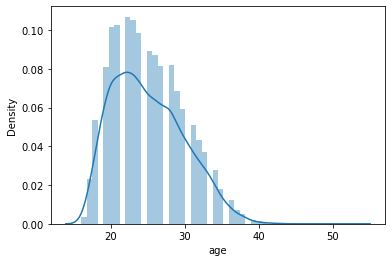

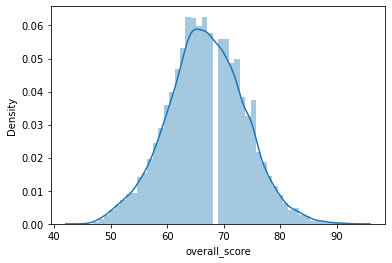

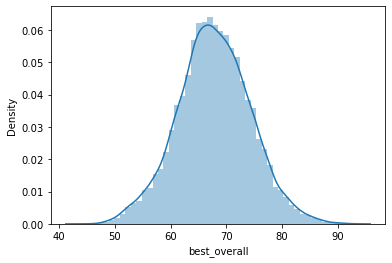

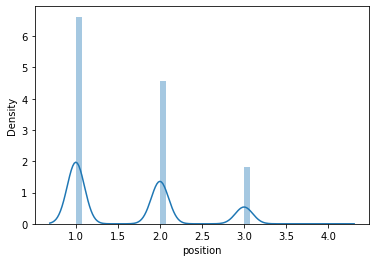

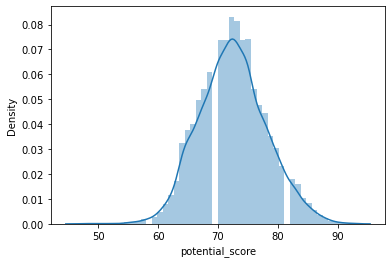

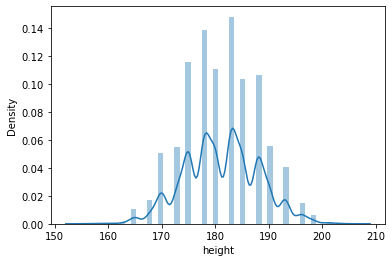

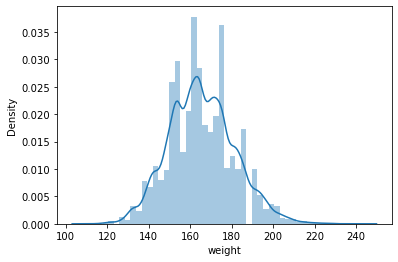

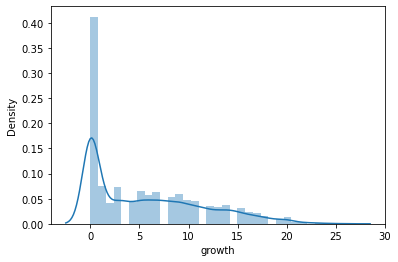

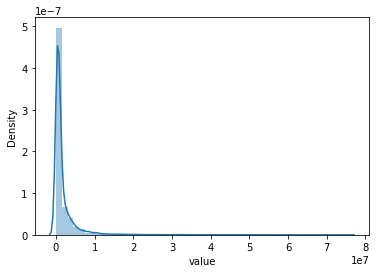

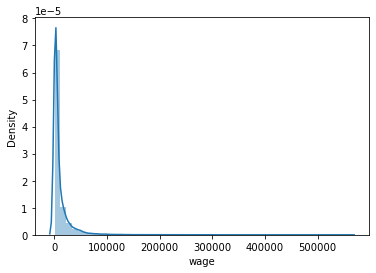

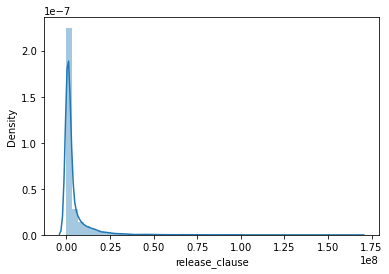

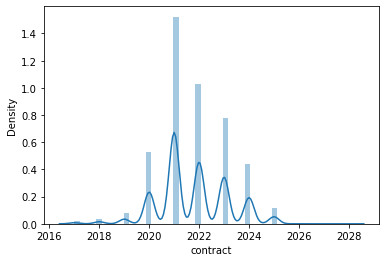

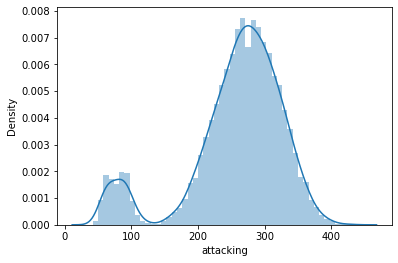

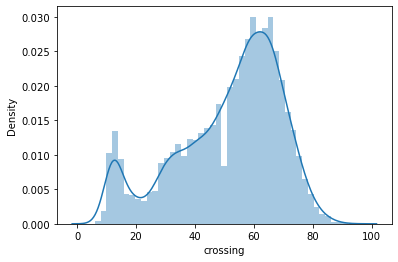

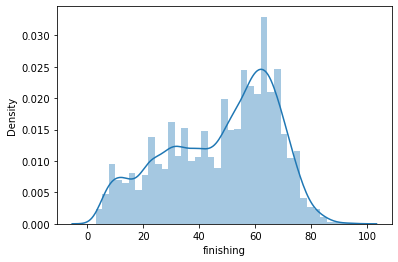

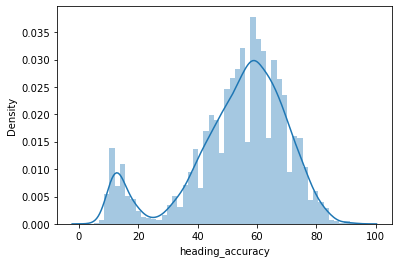

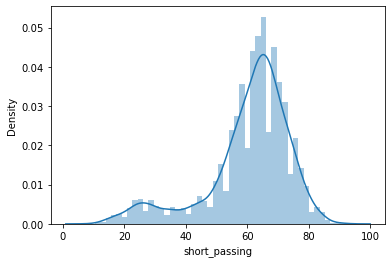

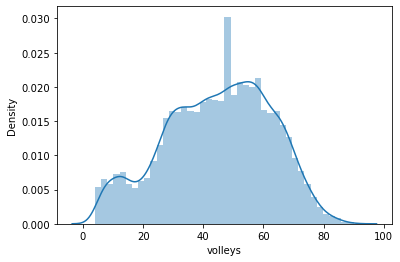

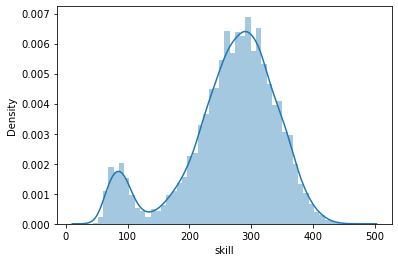

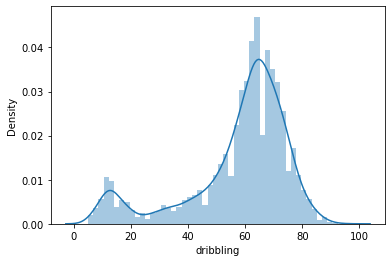

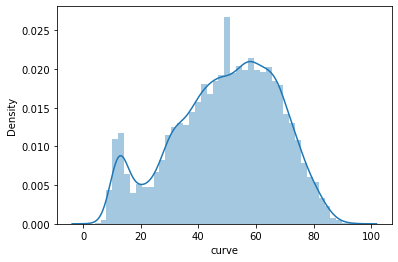

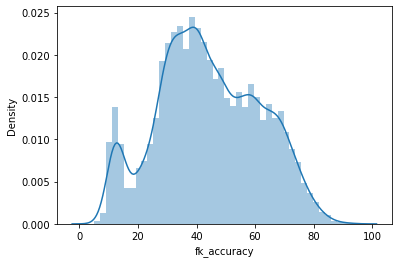

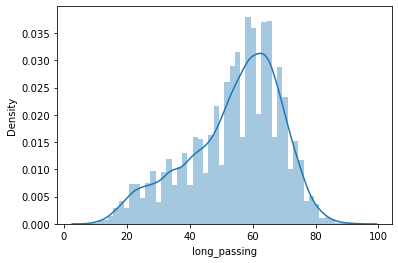

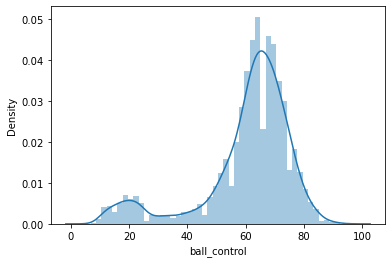

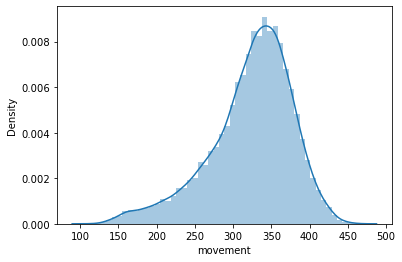

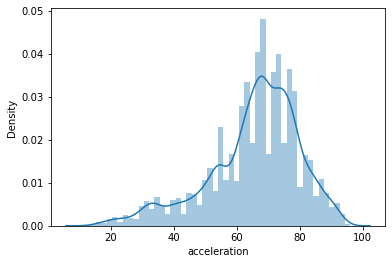

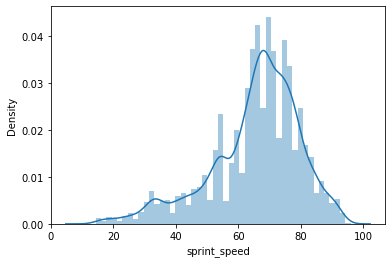

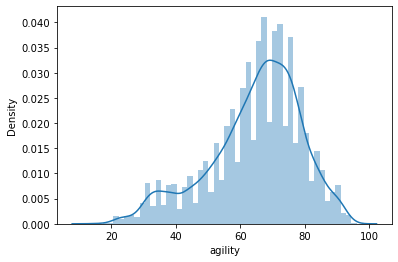

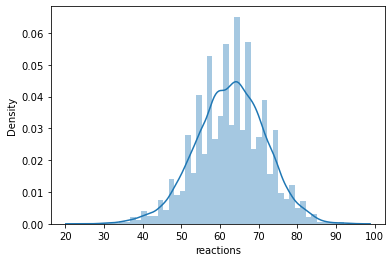

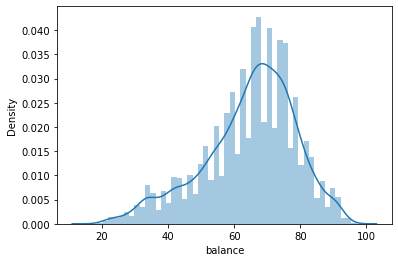

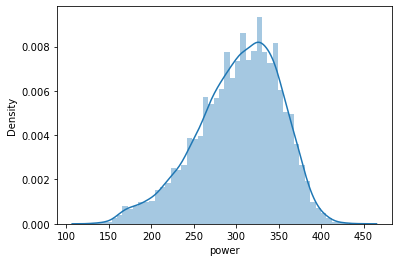

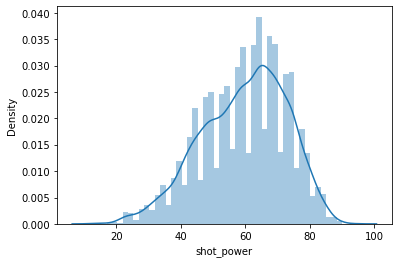

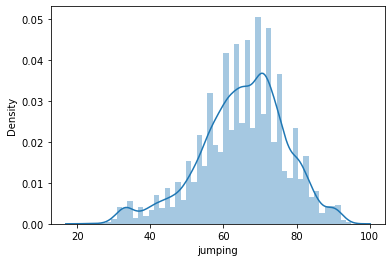

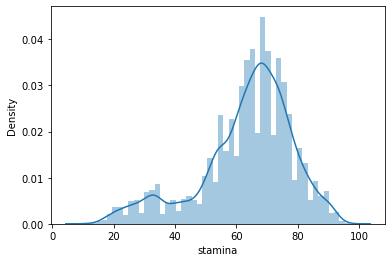

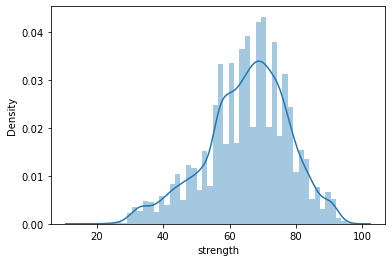

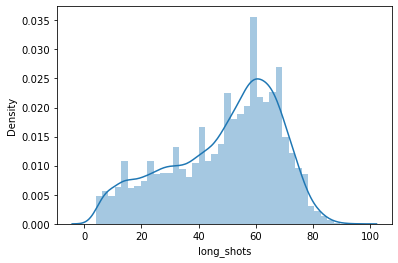

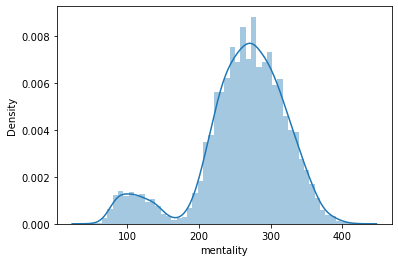

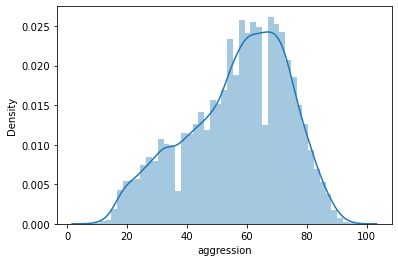

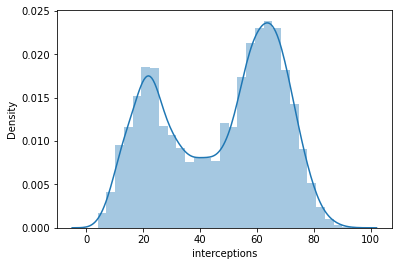

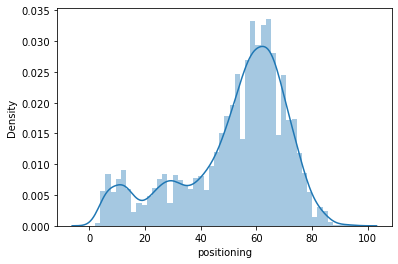

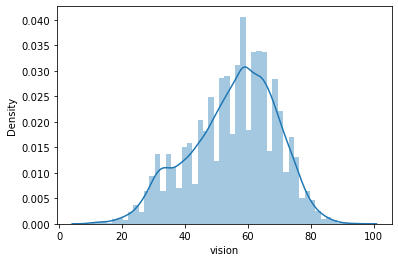

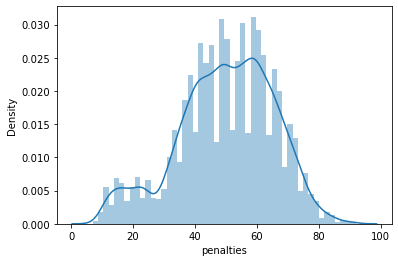

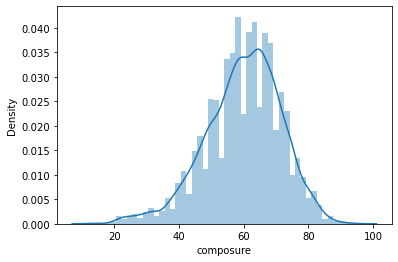

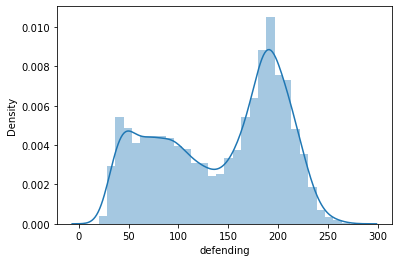

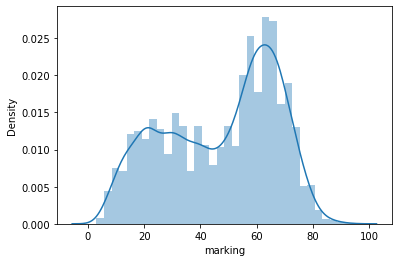

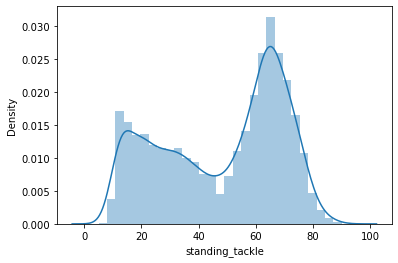

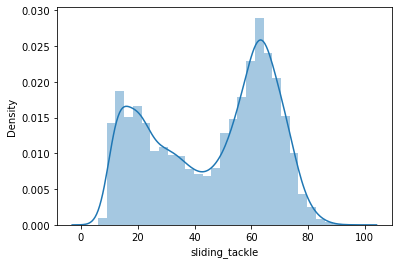

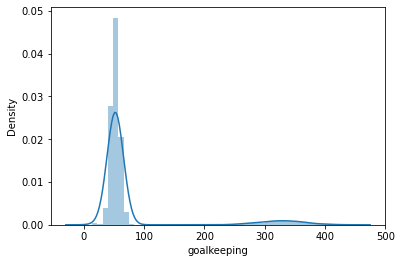

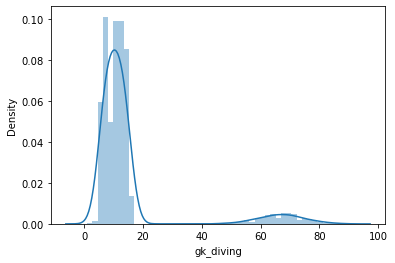

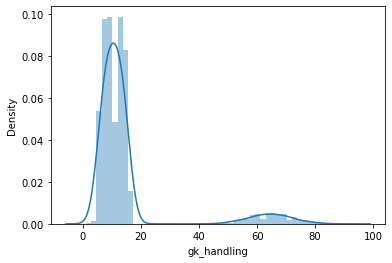

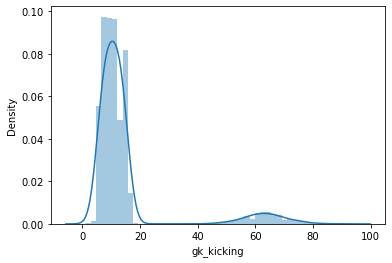

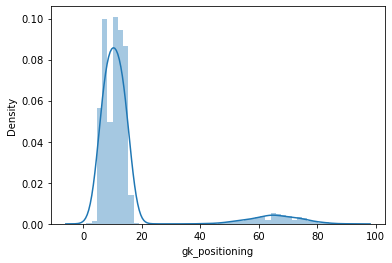

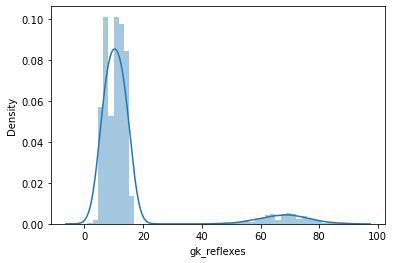

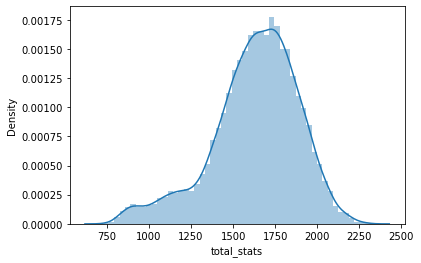

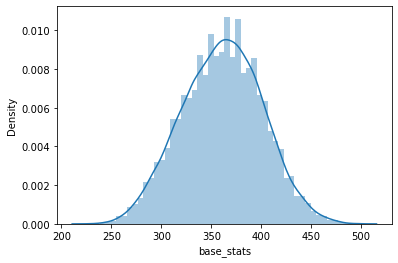

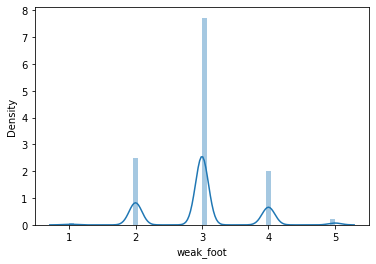

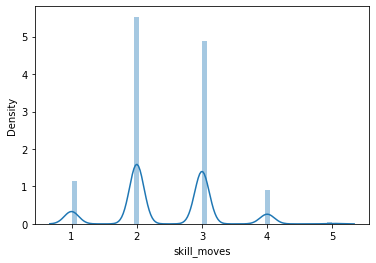

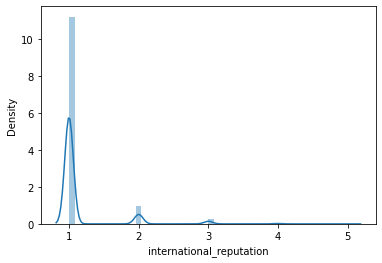

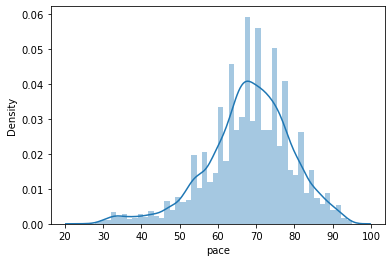

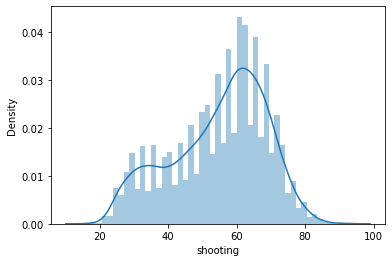

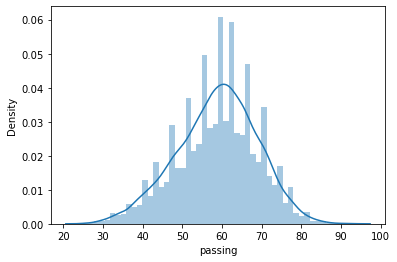

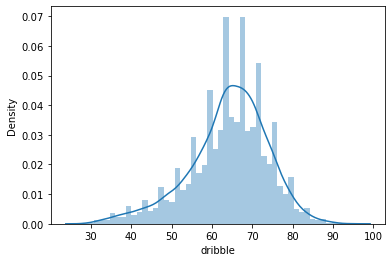

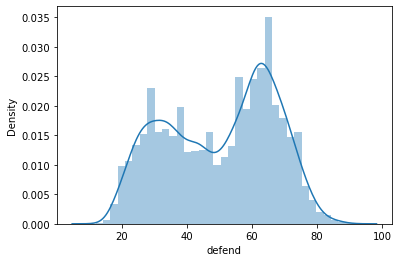

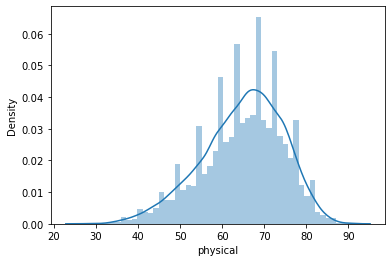

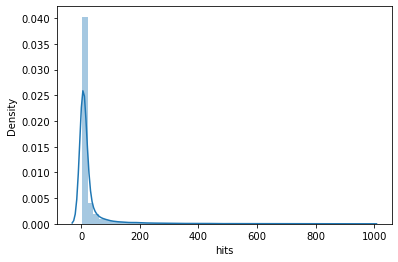

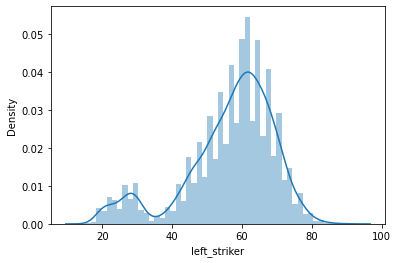

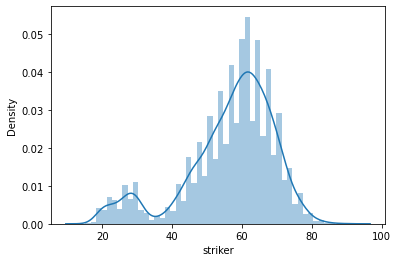

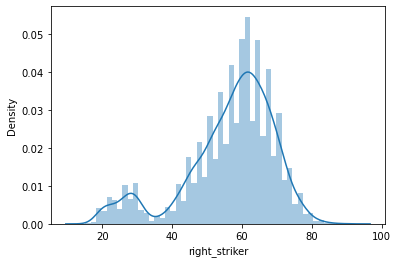

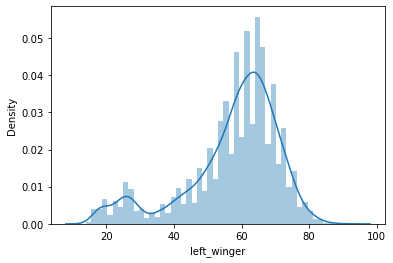

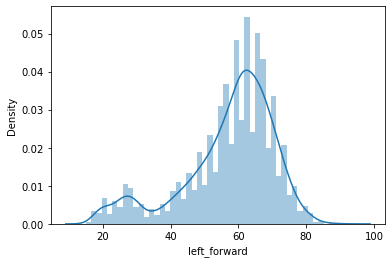

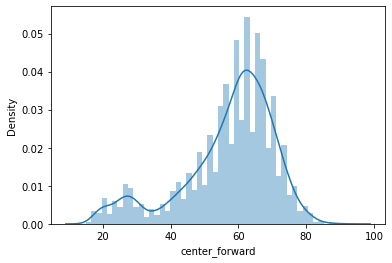

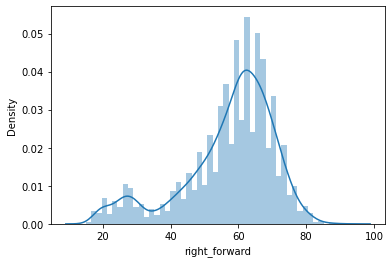

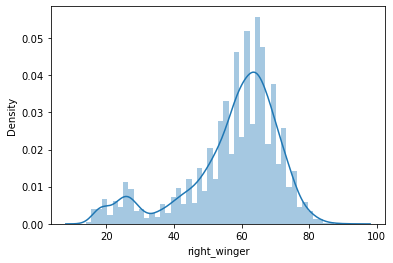

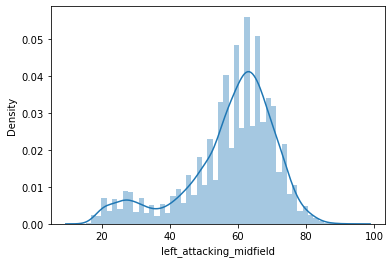

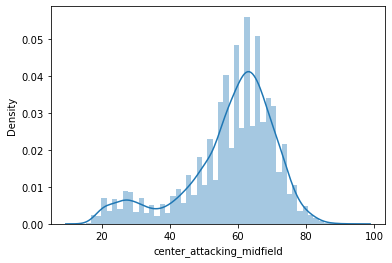

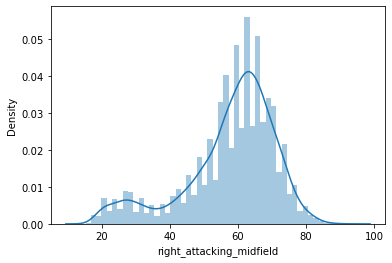

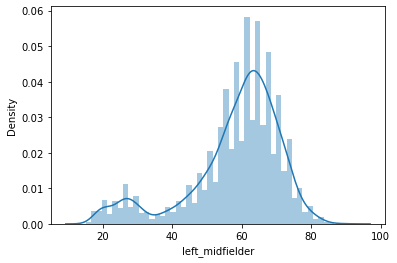

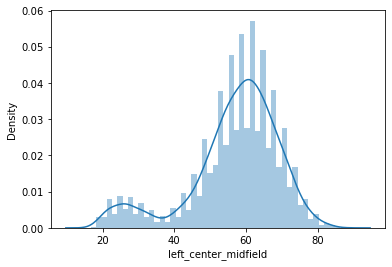

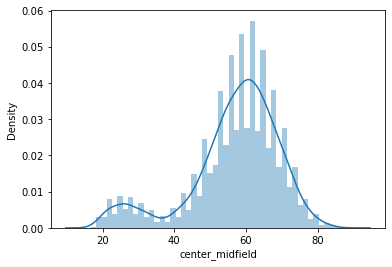

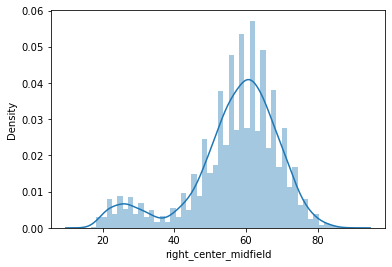

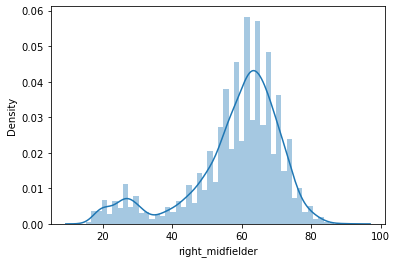

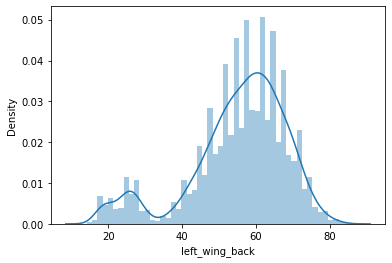

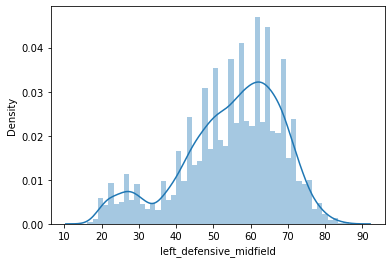

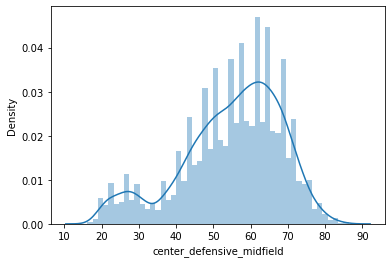

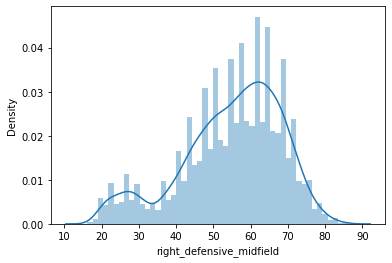

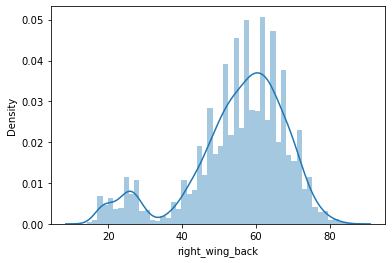

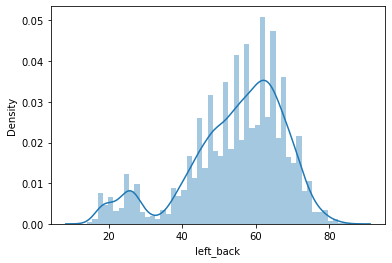

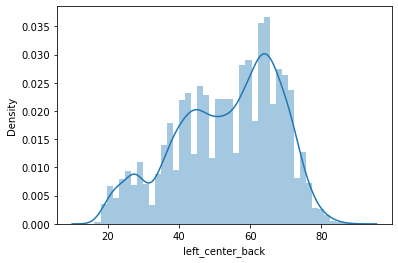

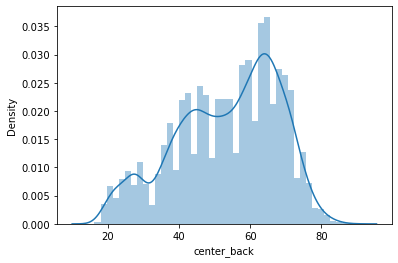

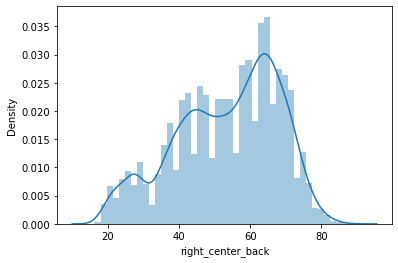

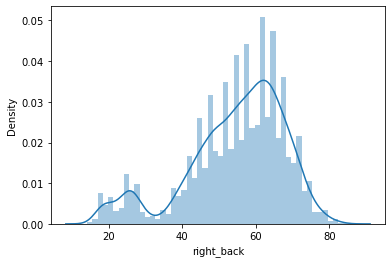

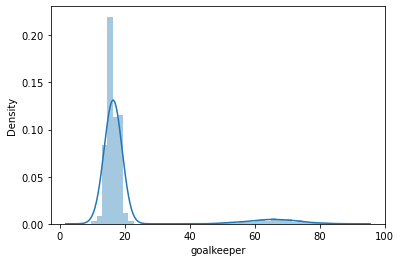

In [61]:
# we want to see the distributions
for column in num.columns:
    sns.distplot(data[column])
    plt.show()
# quite a few are actually Gaussian in shape but we'll normalize anyways and remove outliers

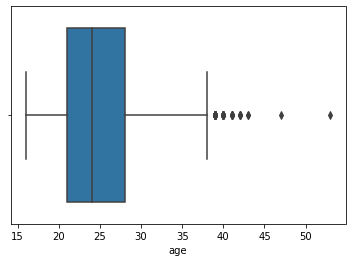

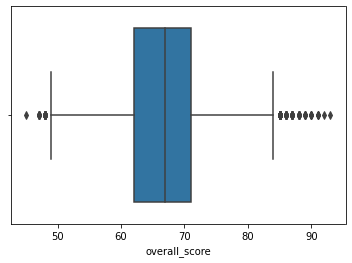

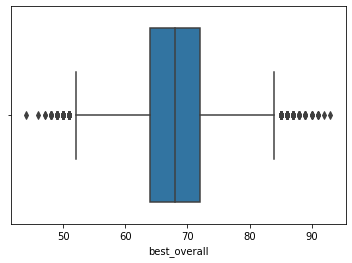

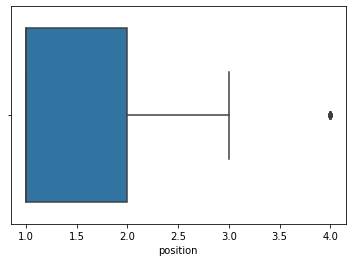

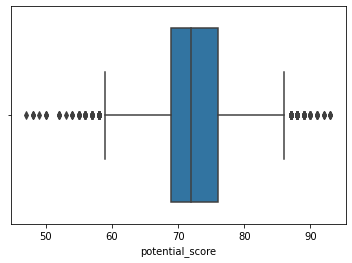

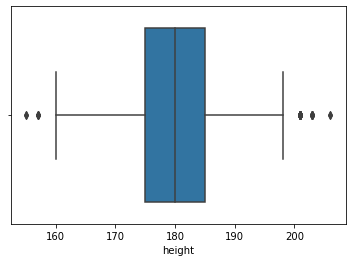

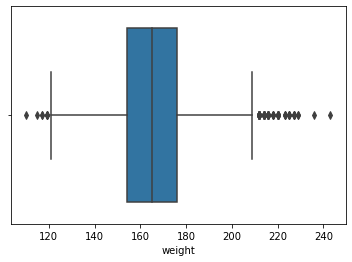

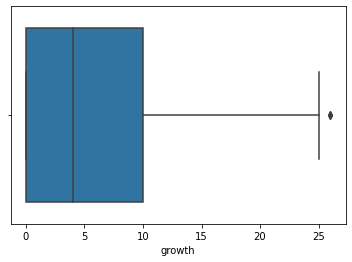

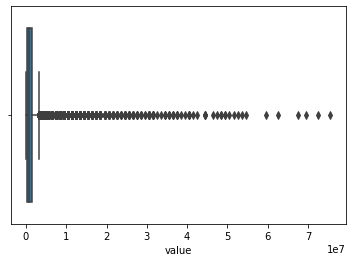

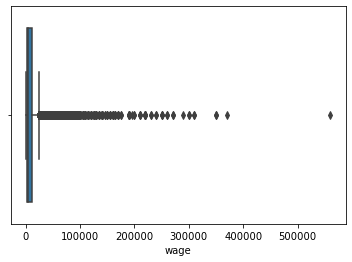

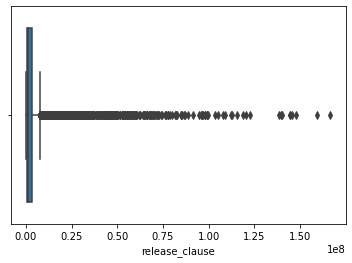

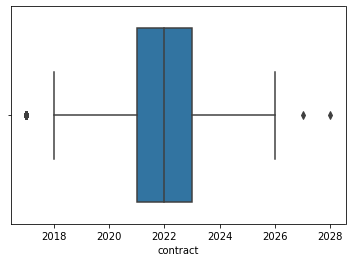

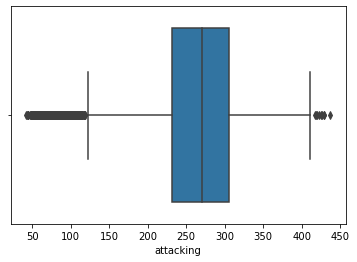

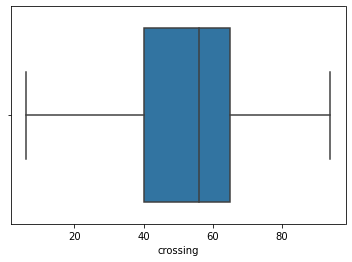

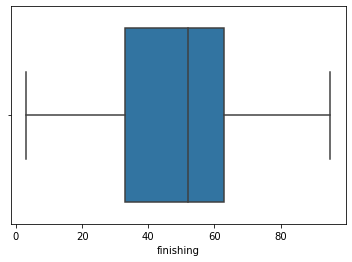

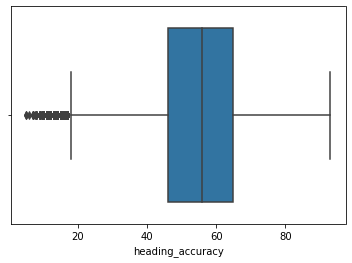

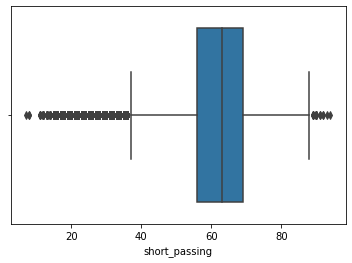

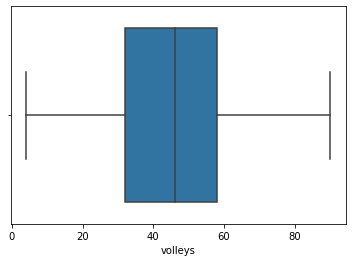

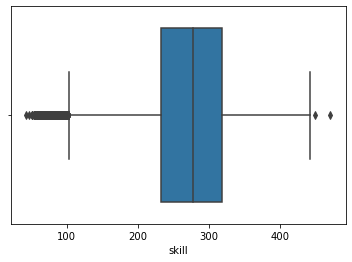

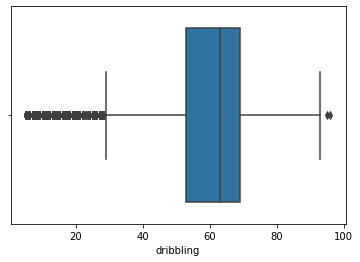

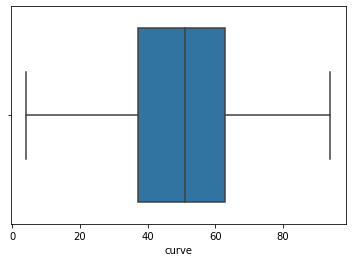

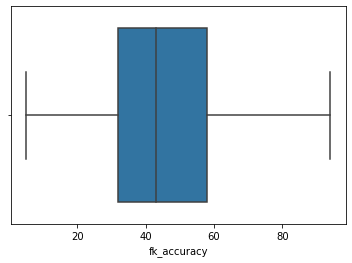

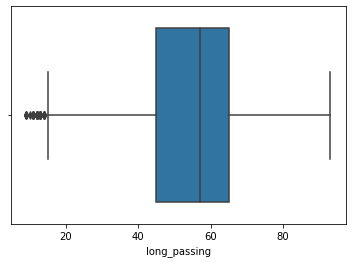

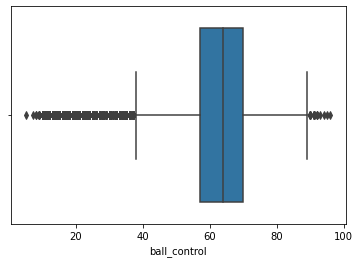

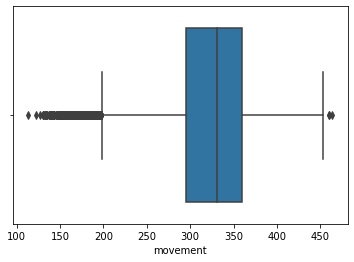

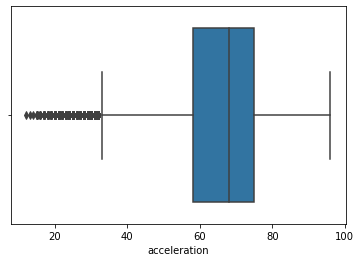

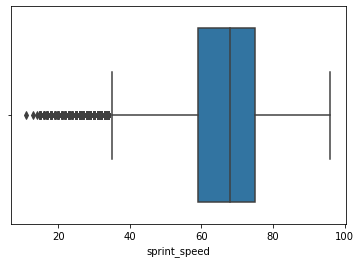

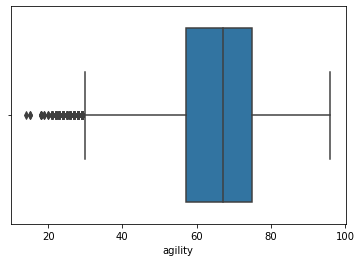

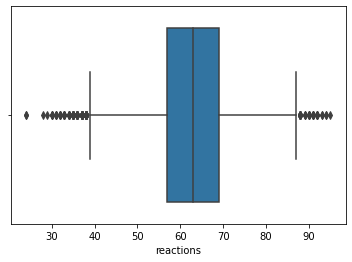

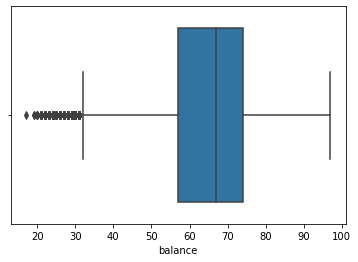

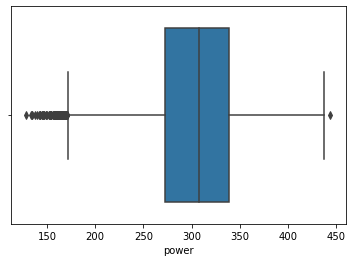

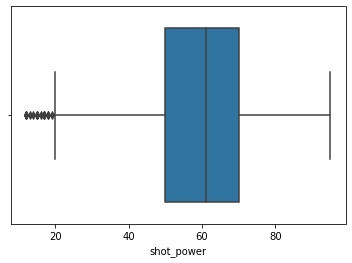

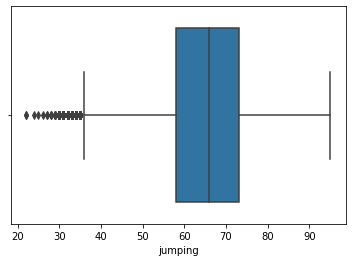

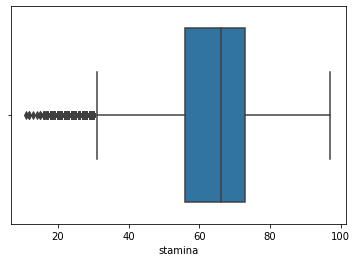

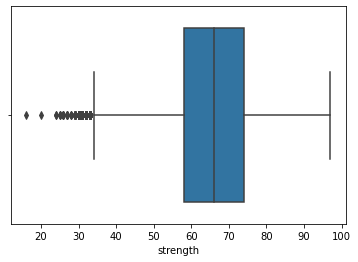

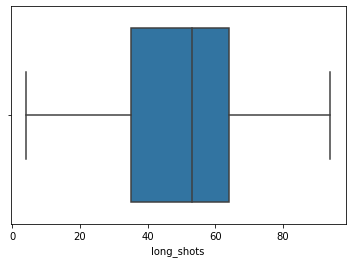

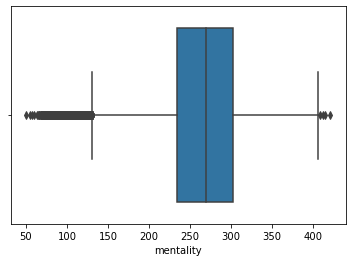

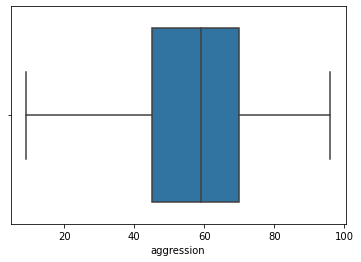

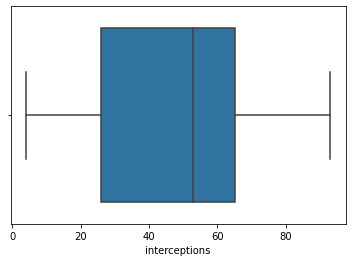

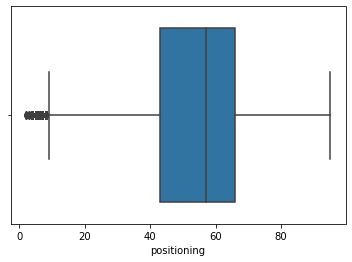

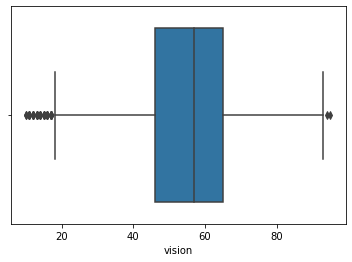

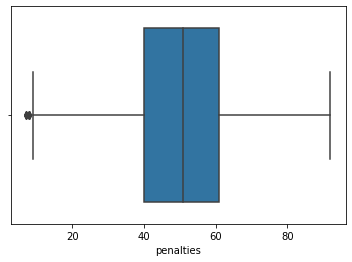

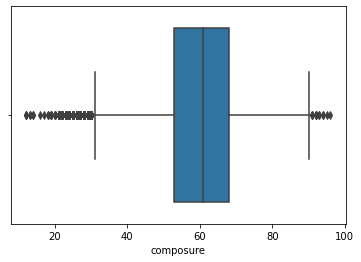

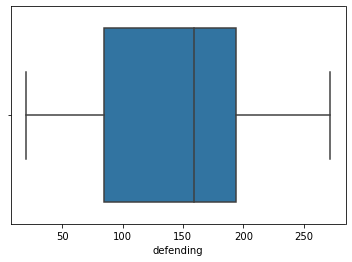

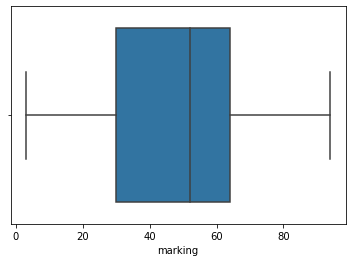

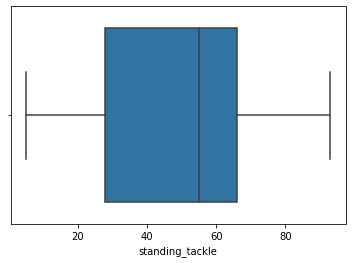

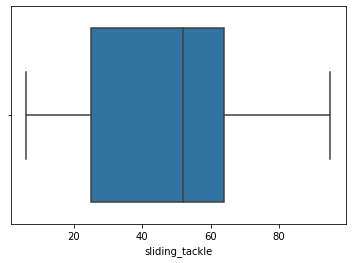

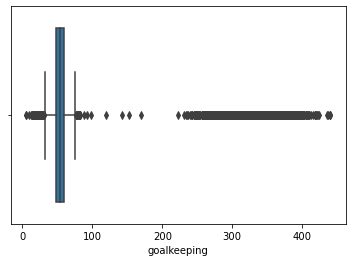

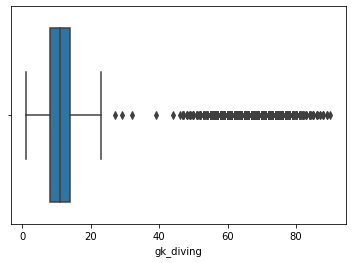

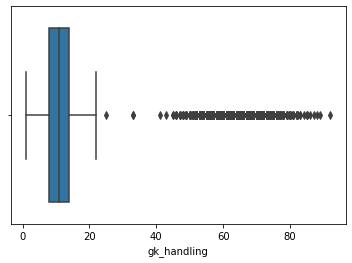

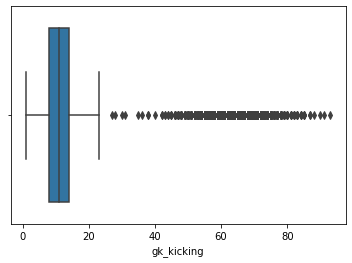

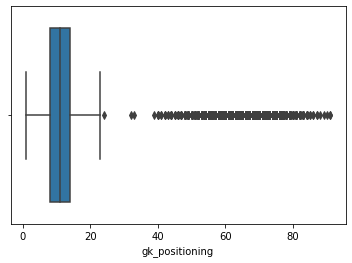

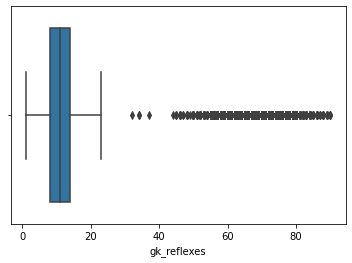

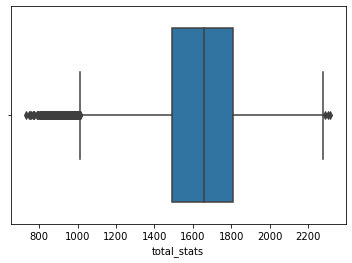

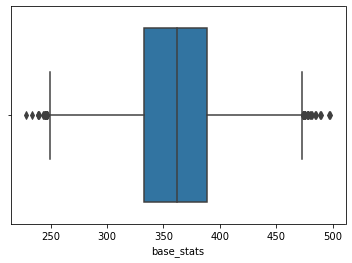

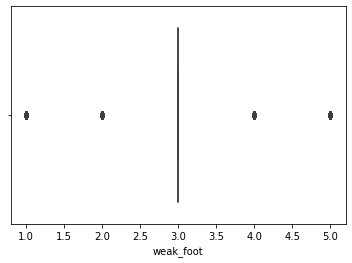

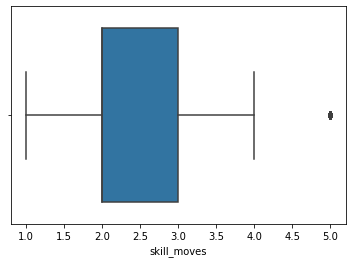

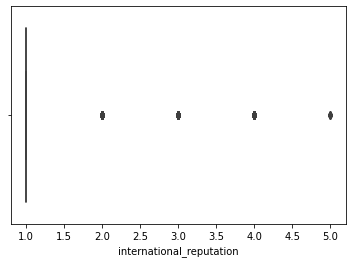

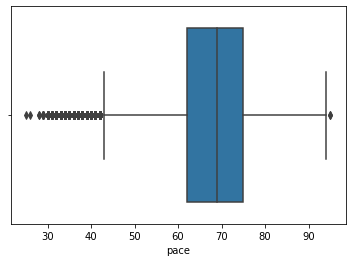

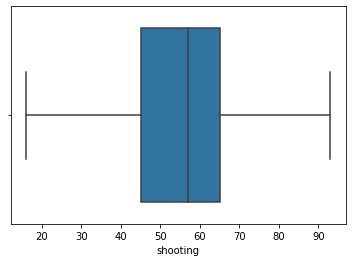

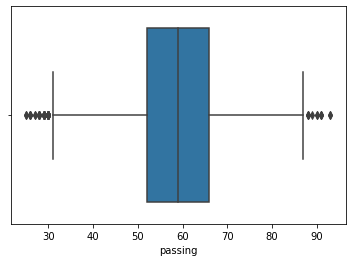

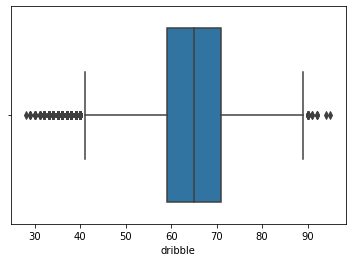

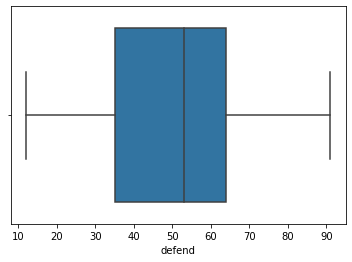

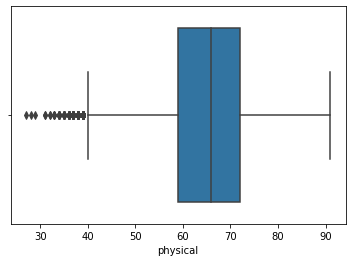

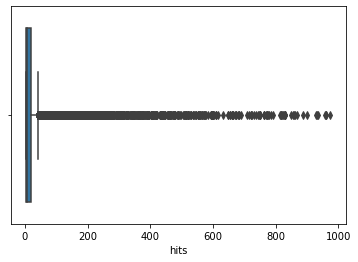

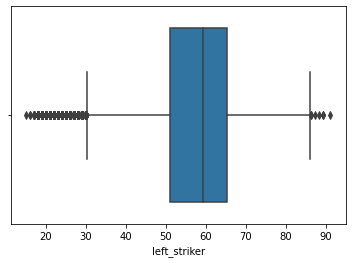

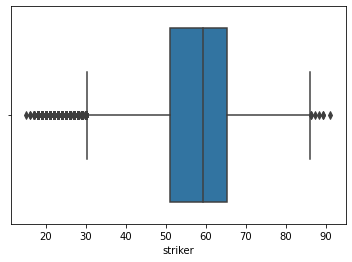

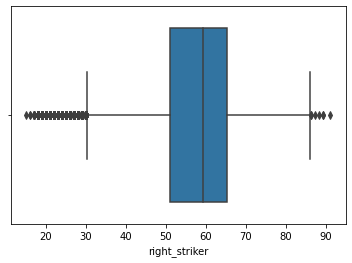

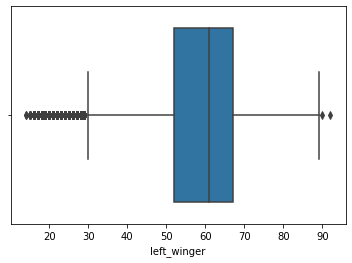

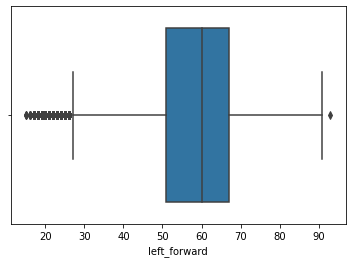

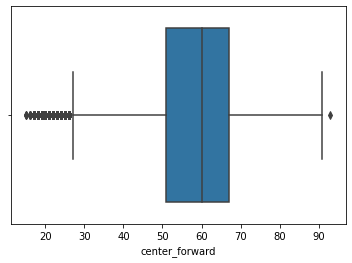

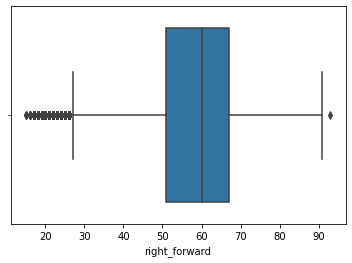

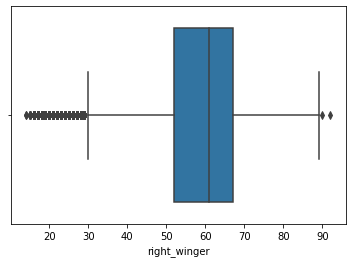

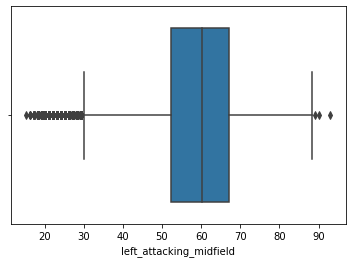

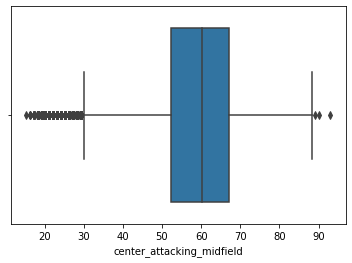

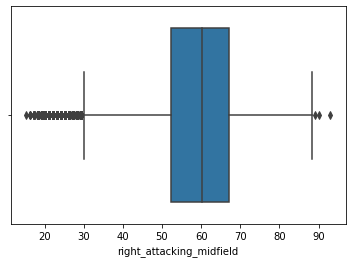

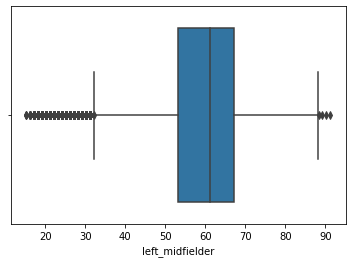

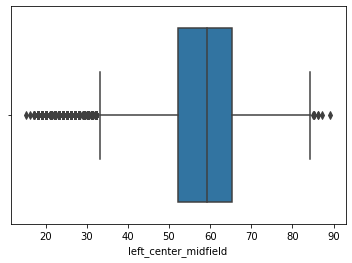

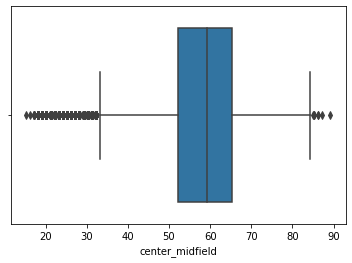

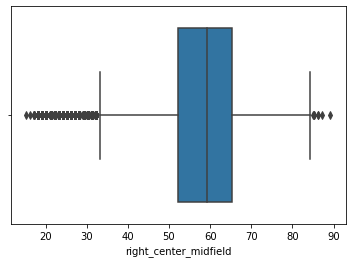

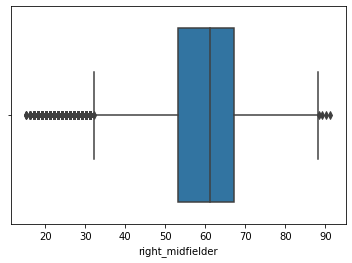

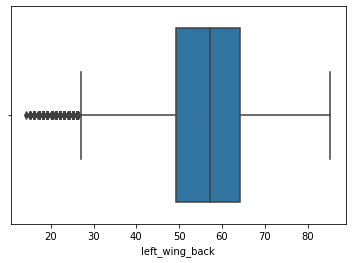

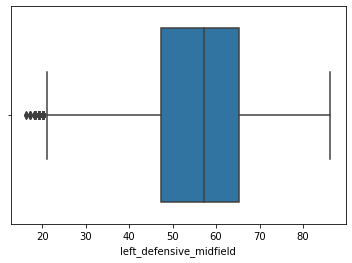

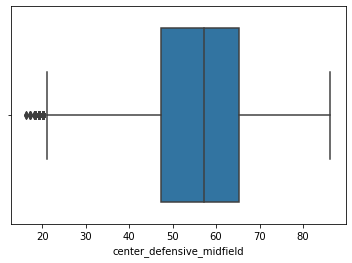

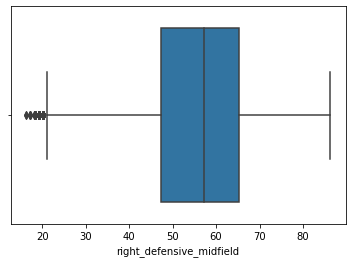

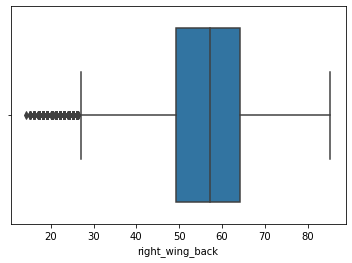

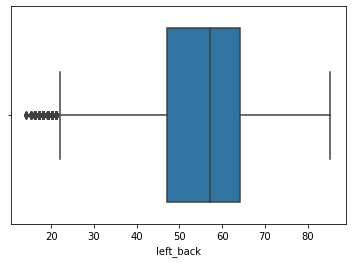

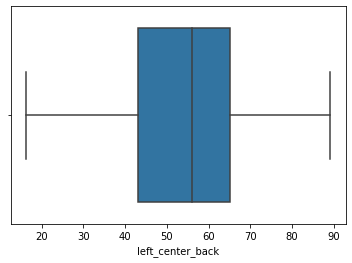

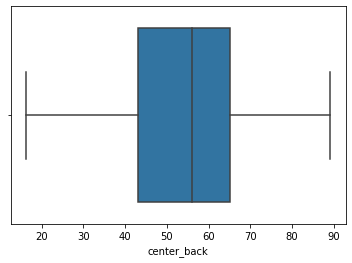

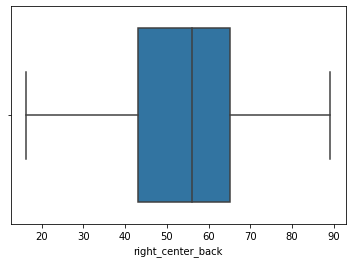

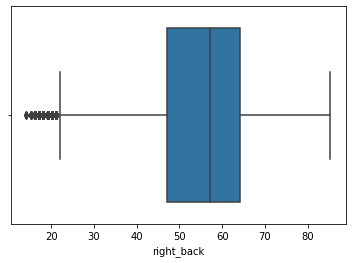

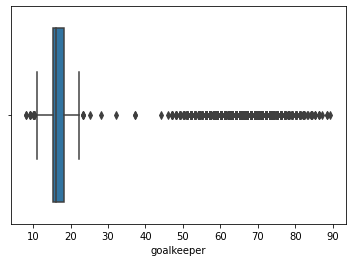

In [62]:
# Box-plot to better see the outliers
for column in num.columns:
    sns.boxplot(data[column])
    plt.show()

In [ ]:
# Checking the correlations
data.corr()

In [ ]:
#HEATMAP
mask = np.zeros_like(data.corr())
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix
fig, ax = plt.subplots(figsize=(80, 76))
ax = sns.heatmap(data.corr(), mask=mask, annot=True)
plt.show()

# first observations:
# value, wage and release clause highly correlated to each other (around 0.6)
# postions very highly correlated (>0.95) to stats that fit positions, ie. attacking positions corrlated to attacking stats
  # => for the future rounds: 
    # positions and stats are highly correlated data:
    # repetition of exogenous variables can twist the model, will probably be dropped

In [63]:
data.head()

name  age  overall_score          nationality           club  \
id                                                                           
16     Luis García   37             71                Spain      KAS Eupen   
41         Iniesta   36             81                Spain    Vissel Kobe   
80    E. Belözoğlu   38             77               Turkey  Fenerbahçe SK   
330       R. Keane   35             80  Republic of Ireland      LA Galaxy   
1179     G. Buffon   42             82                Italy       Juventus   

      best_overall best_position  position  potential_score  height  weight  \
id                                                                            
16              70            CM         3               71   178.0   143.0   
41              82           CAM         2               81   170.0   150.0   
80              77            CM         2               77   170.0   159.0   
330             81            CF         1               80   175.0   161.0   
1179            82            GK         1               82   193.0   203.0   

     preferred_foot  growth  joined      value     wage  release_clause  \
id                                                                        
16            Right       0  2014.0   600000.0   7000.0       1100000.0   
41            Right       0  2018.0  5500000.0  12000.0       7200000.0   
80             Left       0  2019.0  2800000.0  44000.0       5300000.0   
330           Right       0  2011.0  5500000.0  10000.0             0.0   
1179          Right       0  2019.0  2200000.0  41000.0       3600000.0   

      contract  attacking  crossing  finishing  heading_accuracy  \
id                                                                 
16      2019.0        337        68         64                61   
41      2021.0        367        75         69                54   
80      2020.0        342        80         66                43   
330     2022.0        380        68         84                63   
1179    2021.0         95        13         15                13   

      short_passing  volleys  skill  dribbling  curve  fk_accuracy  \
id                                                                   
16               76     68.0    369         69   79.0           79   
41               90     79.0    408         85   80.0           70   
80               84     69.0    406         77   83.0           80   
330              81     84.0    374         82   82.0           63   
1179             37     17.0    122         26   20.0           13   

      long_passing  ball_control  movement  acceleration  sprint_speed  \
id                                                                       
16              71            71       305            56            50   
41              83            90       346            61            56   
80              85            81       308            54            36   
330             63            84       380            69            68   
1179            35            28       251            37            30   

      agility  reactions  balance  power  shot_power  jumping  stamina  \
id                                                                       
16       62.0         65     72.0    324          75     54.0       64   
41       79.0         75     75.0    297          67     40.0       58   
80       67.0         70     81.0    340          77     72.0       51   
330      77.0         83     83.0    363          81     62.0       72   
1179     55.0         80     49.0    243          56     71.0       34   

      strength  long_shots  mentality  aggression  interceptions  positioning  \
id                                                                              
16          60          71        362          71           71.0         72.0   
41          62          70        370          58           70.0         78.0   
80          64          76        384          87        

In [64]:
# PREPARATION FOR THE MODELING

In [65]:
# First without any scaling

In [66]:
# Function to standardize
def boxcox_transform(data):
    numeric_cols = data.select_dtypes(np.number).columns
    print(numeric_cols)
    _ci = {column: None for column in numeric_cols}
    for column in numeric_cols:
        if len(data[column].unique()) < 10:
            continue
        else:
            # since i know any columns should take negative numbers, to avoid -inf in df
            data[column] = np.where(data[column]<=0, np.NAN, data[column]) 
            data[column] = data[column].fillna(data[column].median())
            transformed_data, ci = stats.boxcox(data[column])
            data[column] = transformed_data
            _ci[column] = [ci] 
    return data, _ci

In [67]:
data, _ci = boxcox_transform(data)

Index(['age', 'overall_score', 'best_overall', 'position', 'potential_score',
       'height', 'weight', 'growth', 'value', 'wage', 'release_clause',
       'contract', 'attacking', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'skill', 'dribbling', 'curve',
       'fk_accuracy', 'long_passing', 'ball_control', 'movement',
       'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance',
       'power', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'mentality', 'aggression', 'interceptions', 'positioning', 'vision',
       'penalties', 'composure', 'defending', 'marking', 'standing_tackle',
       'sliding_tackle', 'goalkeeping', 'gk_diving', 'gk_handling',
       'gk_kicking', 'gk_positioning', 'gk_reflexes', 'total_stats',
       'base_stats', 'weak_foot', 'skill_moves', 'international_reputation',
       'pace', 'shooting', 'passing', 'dribble', 'defend', 'physical', 'hits',
       'left_striker', 'striker', 'right_str

name       age  overall_score          nationality  \
id                                                                      
16          Luis García  2.298480      56.179605                Spain   
41              Iniesta  2.288193      63.671754                Spain   
80         E. Belözoğlu  2.308419      60.682752               Turkey   
330            R. Keane  2.277536      62.925446  Republic of Ireland   
1179          G. Buffon  2.345082      64.417449                Italy   
...                 ...       ...            ...                  ...   
259088       A. Medioub  2.089583      50.893562               France   
259090       W. Rickard  2.000700      44.804608                Wales   
259091       C. Barrett  2.000700      44.804608              England   
259101   J. Gazibegović  2.047972      49.376343   Bosnia Herzegovina   
259105  Pablo Rodríguez  2.000700      47.094352                Spain   

                 club  best_overall best_position  position  potential_score  \
id                                                                             
16          KAS Eupen     53.732953            CM         3        16.887729   
41        Vissel Kobe     62.360199           CAM         2        18.281366   
80      Fenerbahçe SK     58.778084            CM         2        17.733871   
330         LA Galaxy     61.645141            CF         1        18.145668   
1179         Juventus     62.360199            GK         1        18.416303   
...               ...           ...           ...       ...              ...   
259088     CD Tondela     50.832936            CB         1        16.598502   
259090        Burnley     44.991661           CAM         2        16.157408   
259091        Burnley     43.522031            RB         1        16.305434   
259101  SK Sturm Graz     47.919484            RB         2        17.173270   
259105          Lecce     47.188915            ST         1        17.314704   

           height    weight preferred_foot    growth  joined     value  \
id                                                                       
16      63.899654  7.071438          Right  4.241620  2014.0  8.128971   
41      61.685310  7.165210          Right  4.241620  2018.0  8.816114   
80      61.685310  7.280365           Left  4.241620  2019.0  8.619683   
330     63.072239  7.305187          Right  4.241620  2011.0  8.816114   
1179    67.986147  7.773167          Right  4.241620  2019.0  8.546860   
...           ...       ...            ...       ...     ...       ...   
259088  69.330517  7.354042          Right  2.761800  2020.0  8.099377   
259090  63.899654  7.413689          Right  5.110200  2020.0  7.577013   
259091  63.072239  7.217108          Right  5.519414  2020.0  7.577013   
259101  63.072239  7.138811          Right  5.519414  2020.0  8.049037   
259105  63.899654  7.217108          Right  7.031499  2020.0  7.915910   

            wage  release_clause  contract     attacking    crossing  \
id                                                                     
16      5.826293        7.729687  0.008782  69842.130584  448.832967   
41      6.038520        8.190411  0.008782  83105.527250  522.638610   
80      6.504532        8.120762  0.008782  71971.176819  577.756576   
330     5.968036        7.774055  0.008782  89218.060183  448.832967   
1179    6.480762        8.029899  0.008782   5283.144115   33.846434   
...          ...             ...       ...           ...         ...   
259088  5.285438        7.774055  0.008782  23373.344745  159.728837   
259090  5.468121        7.330877  0.008782  37375.041054  278.285120   
259091  5.285438        7.330877  0.008782  28735.120736  322.743546   
259101  5.468121        7.637559  0.008782  30094.900491  388.810907   
259105  5.285438        7.638965  0.008782  39241.859327  138.909643   

         finishing  heading_accuracy  short_passing     volleys         skill  \
id                                             

In [68]:
# Function to remove the outliers 
def remove_outliers(df, threshold=1.5):
    numerical = df.select_dtypes(np.number)
    columns = numerical.columns
    for column in columns:
        if len(df[column].unique()) < 10:
            continue
        else:
            upper = np.percentile(df[column], 75)
            lower = np.percentile(df[column], 25)
            iqr = upper - lower
            upper_limit = upper + threshold * iqr
            lower_limit = lower - threshold * iqr
            df = df[(df[column]>lower_limit) & (df[column]<upper_limit)]
    return df

In [69]:
data = remove_outliers(data, threshold=1.5)
data.head()

name       age  overall_score nationality  \
id                                                              
16           Luis García  2.298480      56.179605       Spain   
2492              Eliseu  2.255011      59.933903    Portugal   
3281           Tarantini  2.288193      56.931838    Portugal   
3395  S. Wright-Phillips  2.266484      53.918624     England   
3467                Yuri  2.298480      56.179605      Brazil   

                    club  best_overall best_position  position  \
id                                                               
16             KAS Eupen     53.732953            CM         3   
2492          SL Benfica     57.340329            LB         1   
3281          Rio Ave FC     55.178185            CM         1   
3395  New York Red Bulls     53.009161           CAM         1   
3467     SD Ponferradina     54.455957            ST         1   

      potential_score     height    weight preferred_foot   growth  joined  \
id                                                                           
16          16.887729  63.899654  7.071438          Right  4.24162  2014.0   
2492        17.594989  63.072239  7.539751           Left  4.24162  2014.0   
3281        17.030950  66.633076  7.437124          Right  4.24162  2008.0   
3395        16.452459  60.288186  7.043917          Right  4.24162  2016.0   
3467        16.887729  65.816937  7.437124          Right  4.24162  2017.0   

         value      wage  release_clause  contract     attacking    crossing  \
id                                                                             
16    8.128971  5.826293        7.729687  0.008782  69842.130584  448.832967   
2492  7.887302  6.123018        8.145373  0.008782  72400.895516  533.504781   
3281  8.290314  5.763416        7.234410  0.008782  74132.806737  388.810907   
3395  8.010443  5.763416        7.774055  0.008782  55473.140967  459.131211   
3467  8.245364  5.763416        7.774055  0.008782  69842.130584  350.523198   

       finishing  heading_accuracy  short_passing    volleys         skill  \
id                                                                           
16    126.247570        693.985325   18464.540718  86.669545  26174.789751   
2492  114.326990        858.418129   16149.305122  85.281968  23646.910824   
3281  121.454852       1060.625135   18464.540718  88.058710  22547.279895   
3395  119.070631        279.201481   12533.878097  89.449441  20883.863899   
3467  158.140893        753.927190   11599.855251  96.425894  19959.238181   

        dribbling       curve  fk_accuracy  long_passing  ball_control  \
id                                                                       
16    3268.259266  160.703651    43.742844    857.673999  15668.325214   
2492  3675.730480  129.199322    38.979344    776.626735  17361.214072   
3281  3468.882407  126.825724    33.101495    878.455356  17948.658858   
3395  3170.277358  124.459662    39.460799    588.876185  13570.324240   
3467  3367.793651  148.449009    35.082523    377.984580  14596.841883   

          movement  acceleration  sprint_speed      agility   reactions  \
id                                                                        
16    5.844053e+05   2424.502971   2061.915526  1670.212889  201.309065   
2492  9.563149e+05   4508.524790   5064.848928  2301.054228  235.371856   
3281  4.896419e+05   2333.484669   1724.011244  1367.870657  244.094916   
3395  1.014726e+06   4767.641097   5064.848928  2426.356331  222.440371   
3467  6.841046e+05   3219.363304   3864.419904  2002.057242  222.440371   

          balance          power  shot_power      jumping      stamina  \
id                                                                       
16    1788.430493   76109.211056  562.022682   637.165361  2555.702780   
2492  1932.825375  117732.769726  722.694083  1083.794995  3543.727177   
3281   963.001897   83075.219640  550.278562  1006.560853  1473.906685   
3395  2343.747093   69458.05813

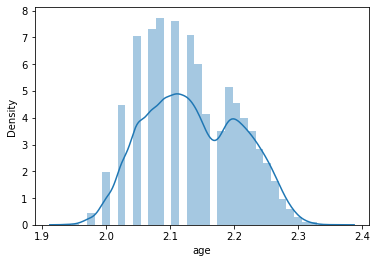

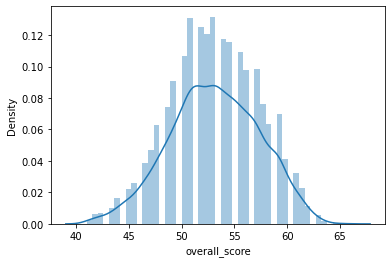

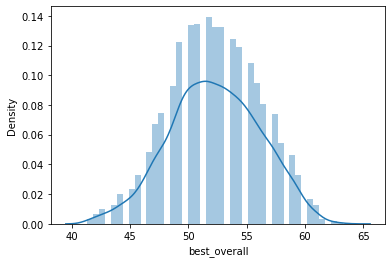

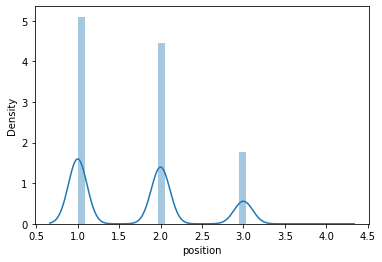

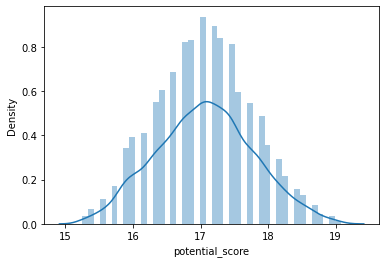

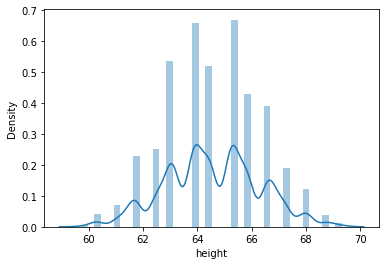

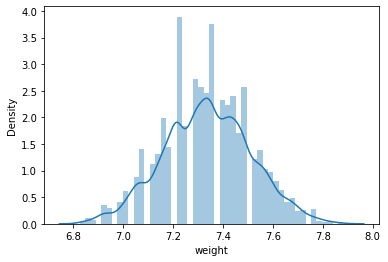

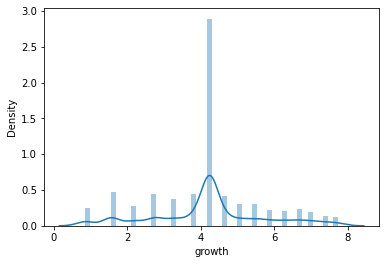

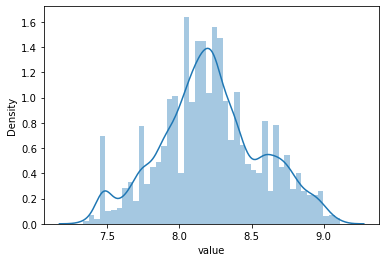

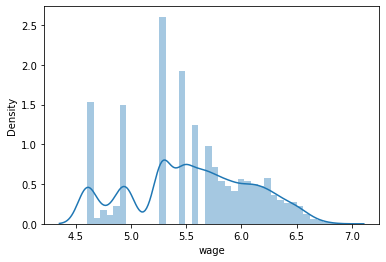

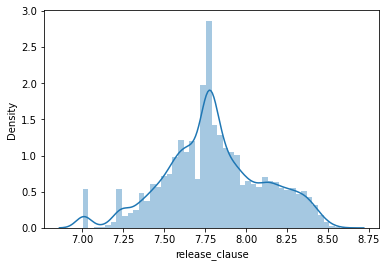

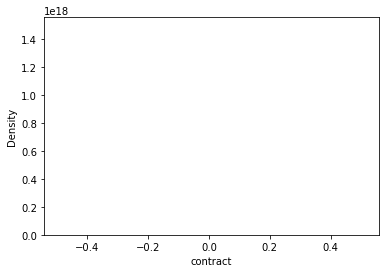

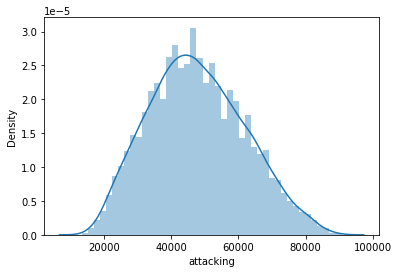

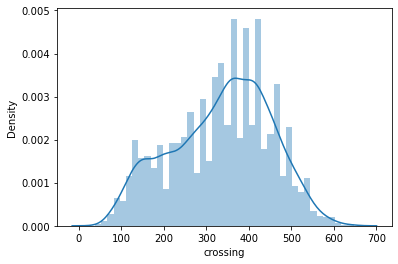

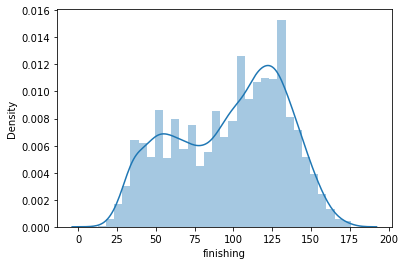

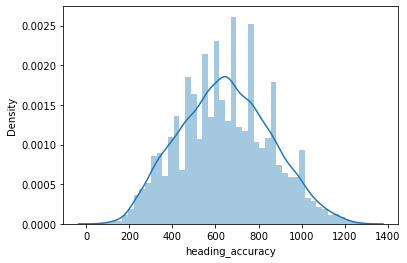

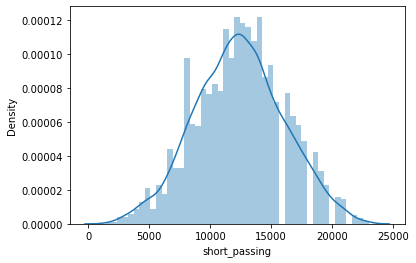

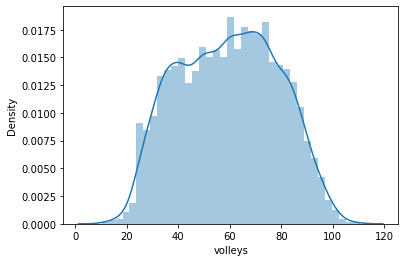

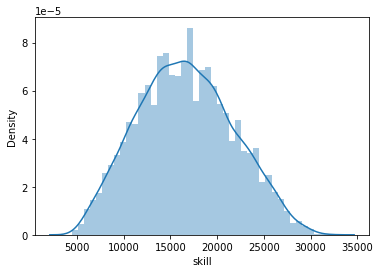

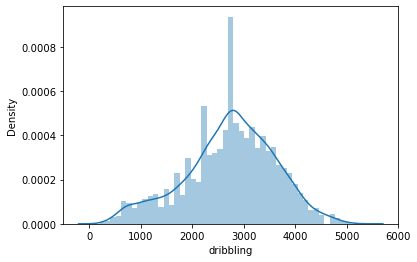

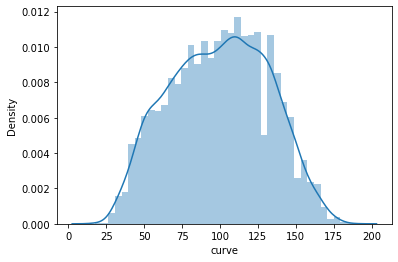

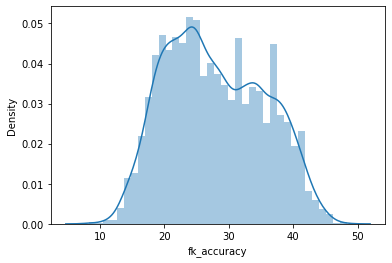

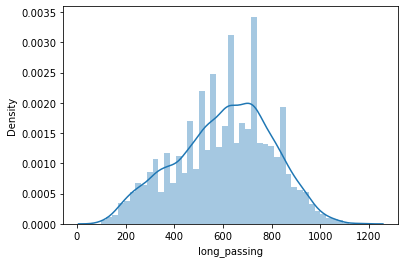

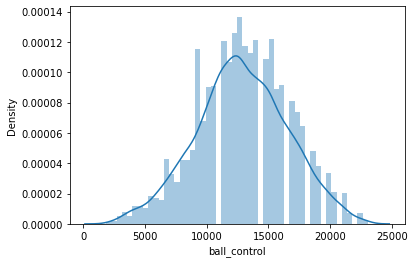

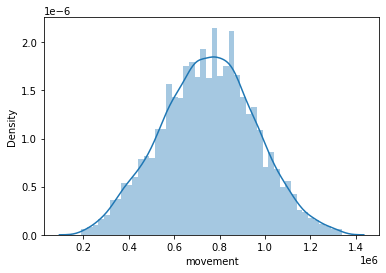

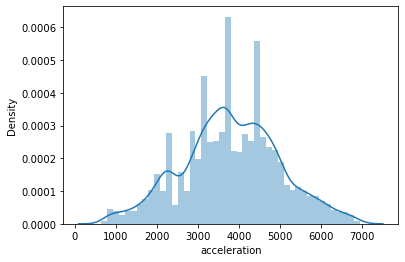

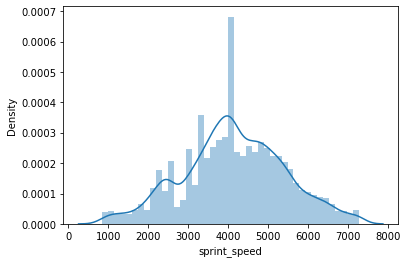

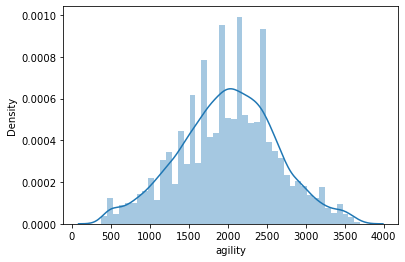

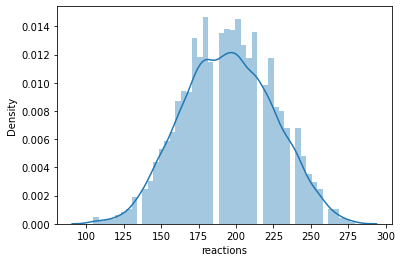

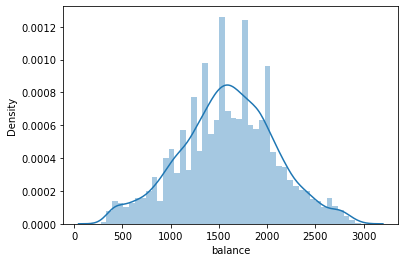

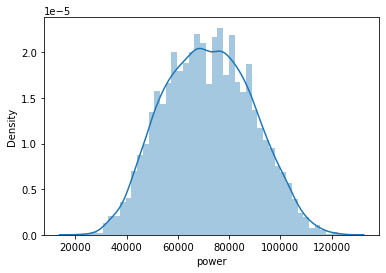

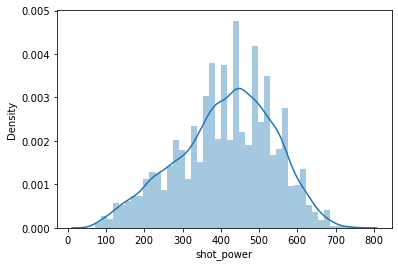

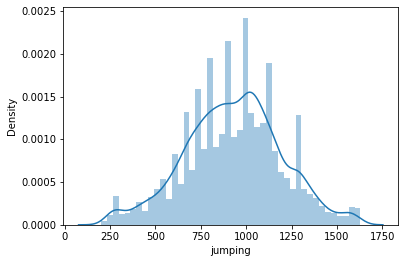

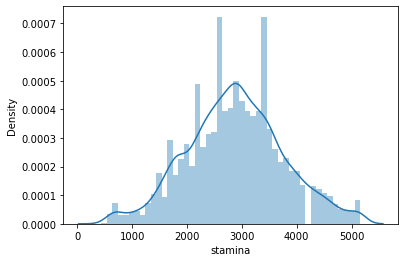

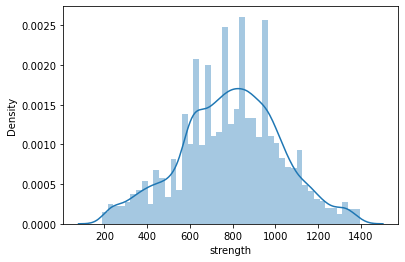

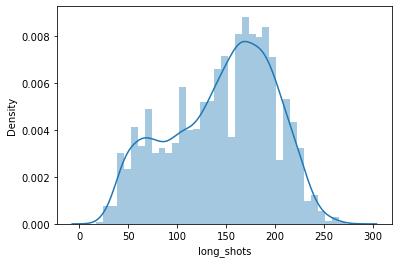

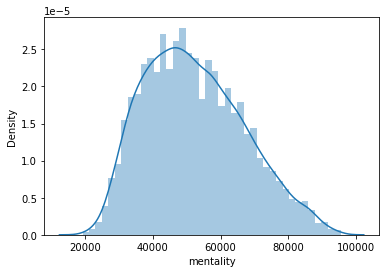

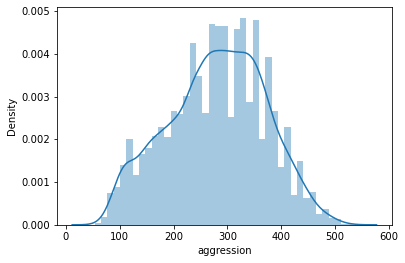

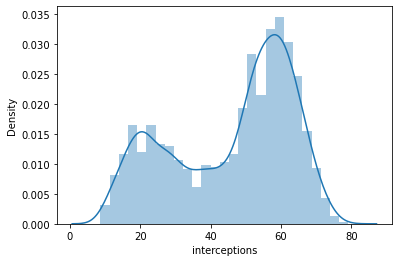

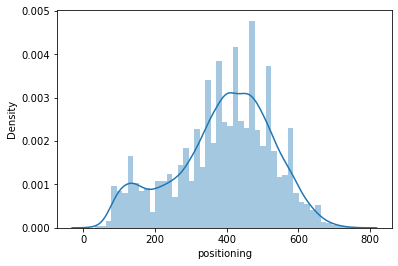

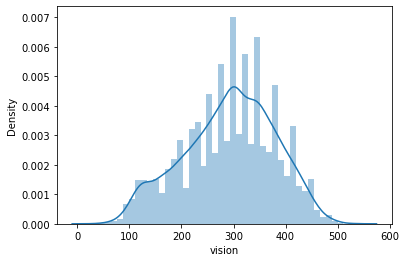

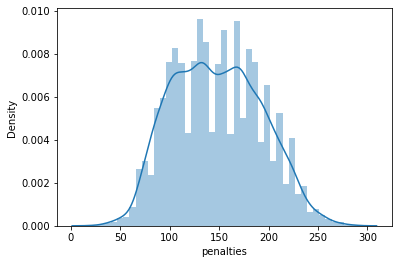

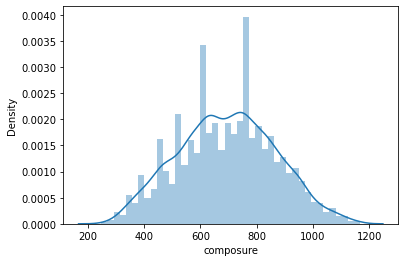

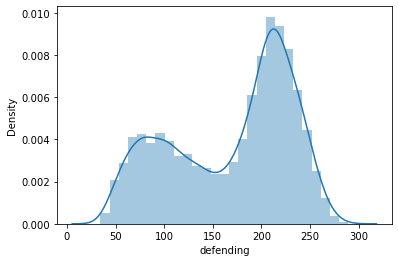

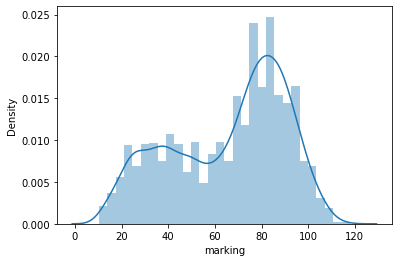

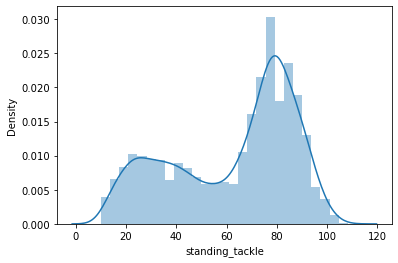

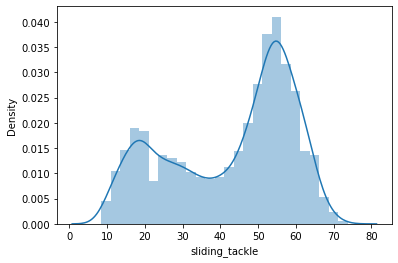

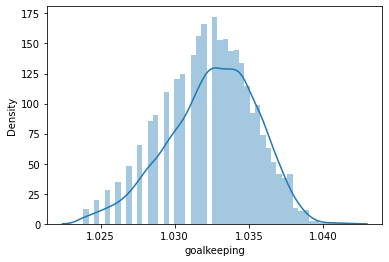

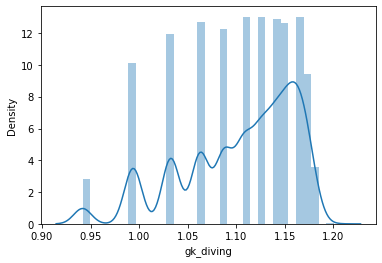

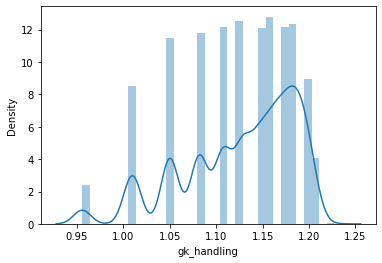

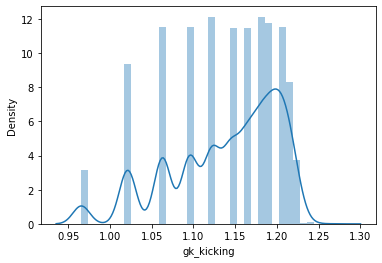

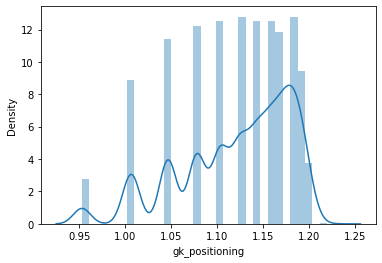

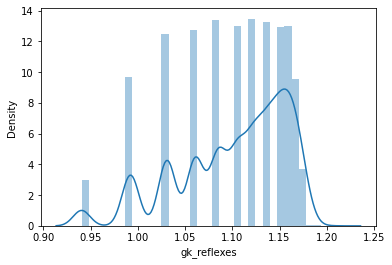

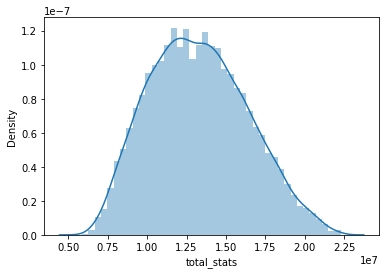

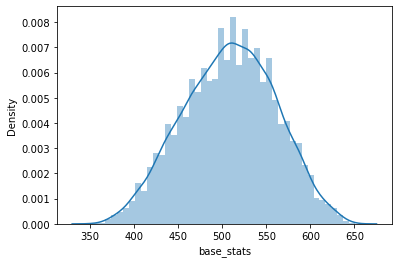

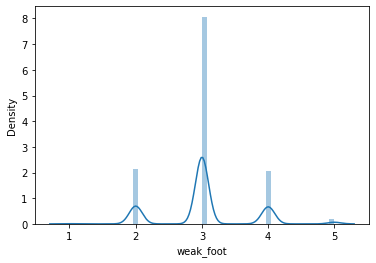

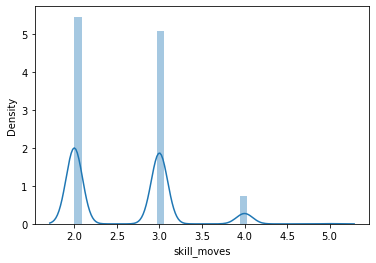

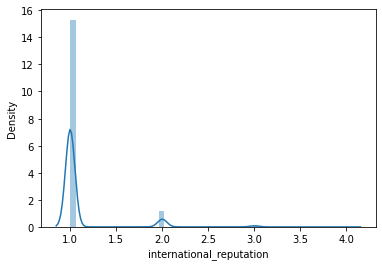

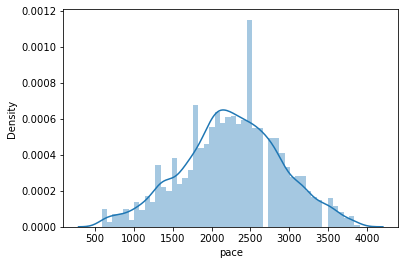

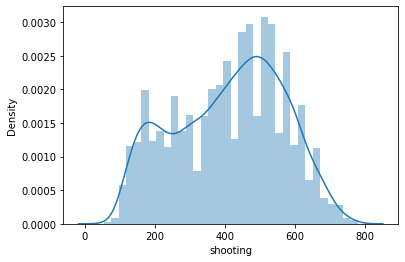

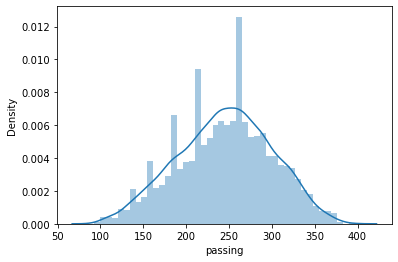

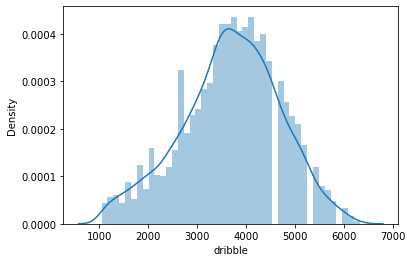

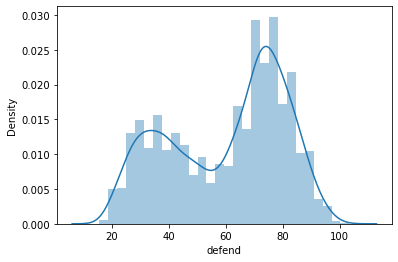

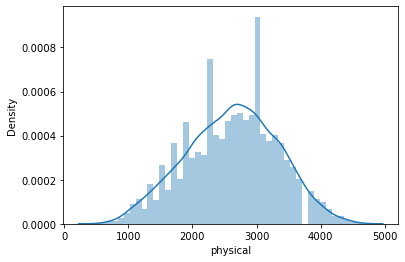

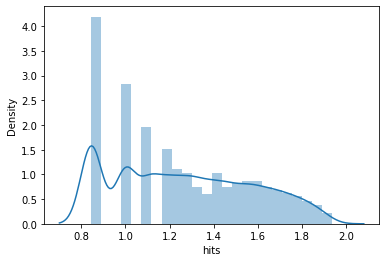

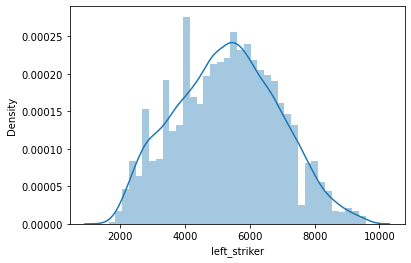

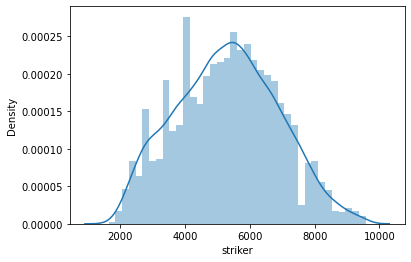

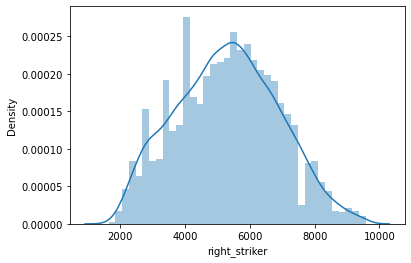

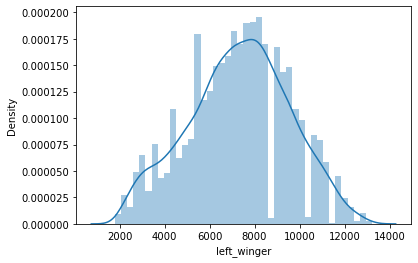

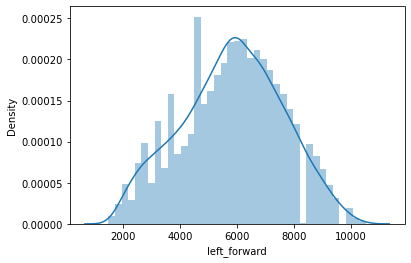

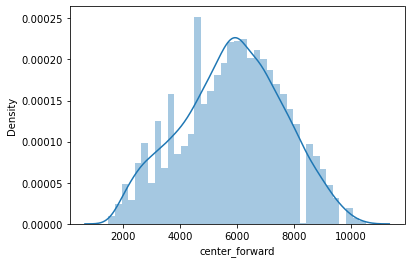

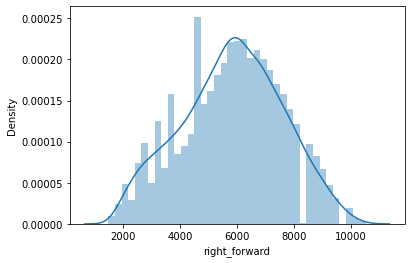

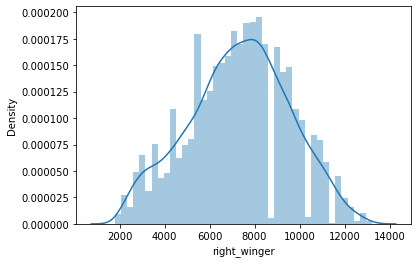

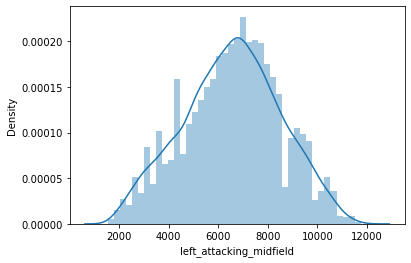

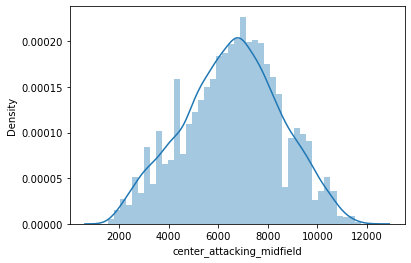

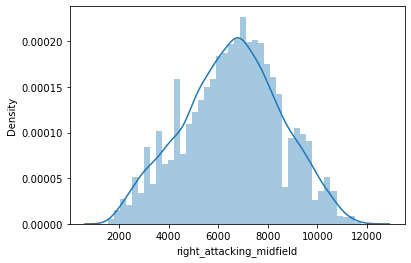

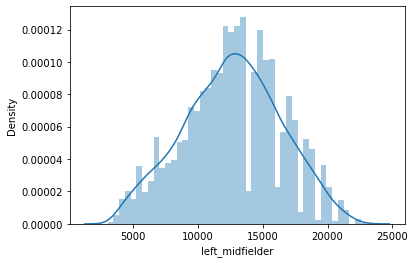

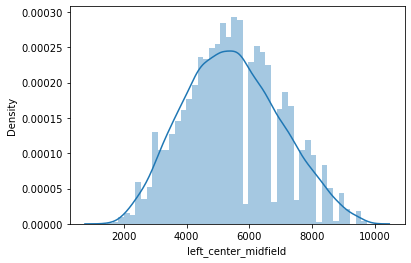

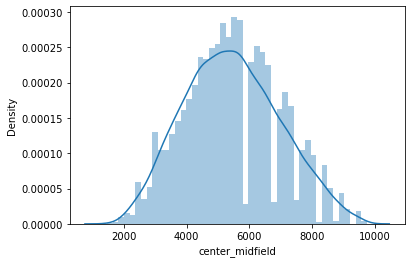

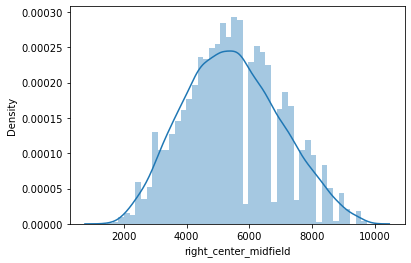

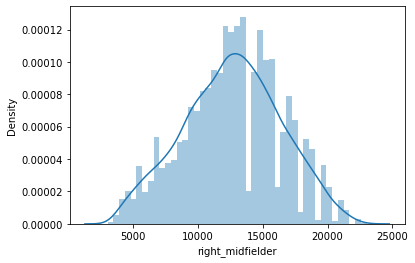

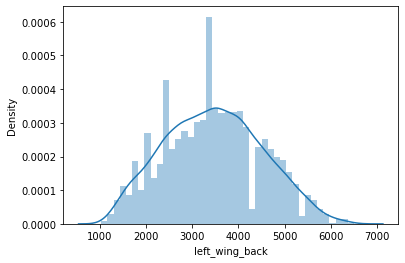

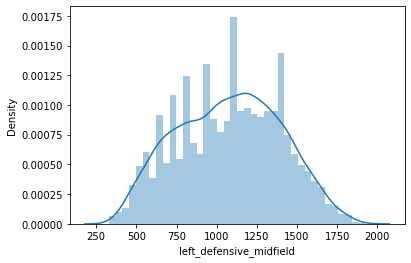

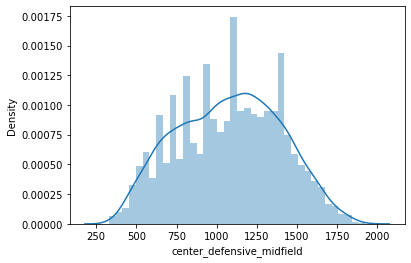

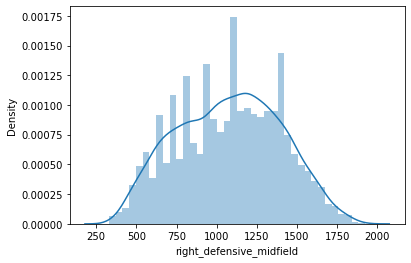

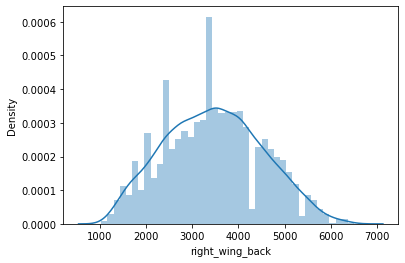

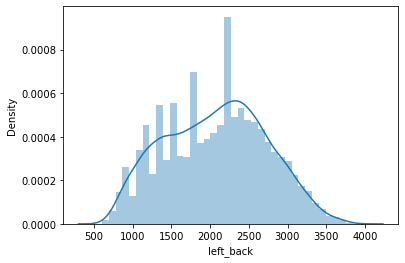

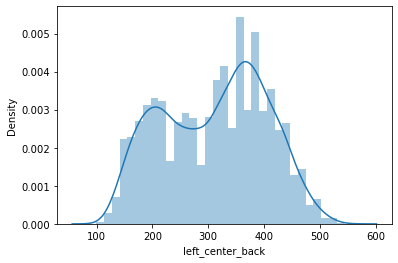

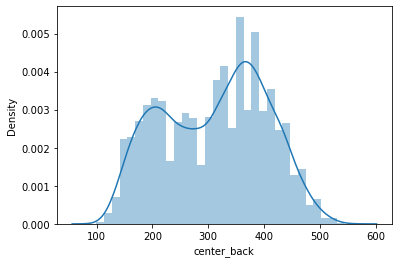

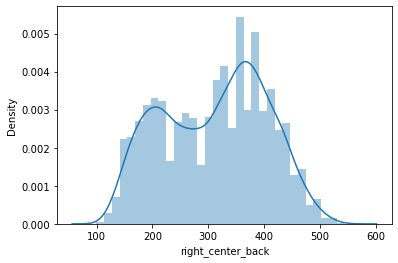

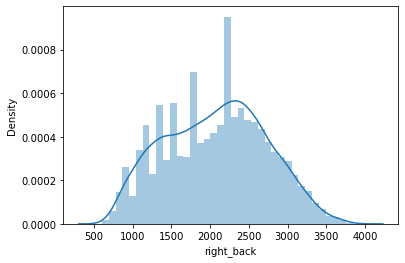

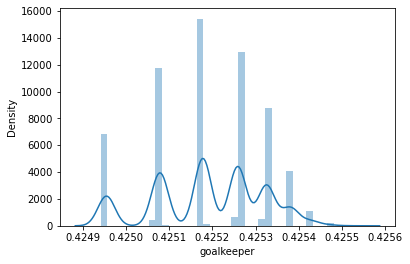

In [70]:
# See the changes in the distributions
for column in num.columns:
    sns.distplot(data[column])
    plt.show()

In [71]:
# Function to find the inputs that have less than 1% correlated with the target
def slim_pickings(data, target, mini, maxi):
    corr = data.corr()
    less_than_1_percent = []
    i = corr.columns.get_loc(target)
    for col in corr.columns:
        j = corr.columns.get_loc(col)
        correlation = corr.iat[i,j]
        if correlation < mini and correlation > maxi:
            less_than_1_percent.append(col)
    return less_than_1_percent

In [72]:
# Function to find the inputs that are more than 95% correlated to each other
# And discard the one that is least correlated to the target
def corr_destroyer(data, target, max_threshold=0.95):
    corr_data = data.corr()
    corr_target = corr_data[target]
    corr_data.drop(target, axis=1, inplace=True)
    corr_data.drop(target, axis=0, inplace=True)

    column_no = corr_data.shape[0]
    to_drop = []

    for i in range(0, column_no):
        for j in range(i + 1, column_no):
            if corr_data.iloc[i, j] > max_threshold:
                if corr_target.iloc[i] > corr_target.iloc[j]:
                    to_drop.append(corr_data.columns[j])
                else:                 
                    to_drop.append(corr_data.columns[i])

    to_drop = list(set(to_drop)) # Get unique values
    return to_drop

In [73]:
# Scaling function
def normalize_data(df):
    num = df.select_dtypes(np.number)
    transformer = MinMaxScaler().fit(num) 
    x_minmax = transformer.transform(num)
    num_norm = pd.DataFrame(x_minmax, columns=num.columns, index=num.index)
    return num_norm

In [74]:
num_norm = normalize_data(data)
num_norm

age  overall_score  best_overall  position  potential_score  \
id                                                                         
16      0.864785       0.609922      0.552663  0.666667         0.428064   
2492    0.758070       0.760473      0.713146  0.000000         0.612576   
3281    0.839531       0.640087      0.616958  0.000000         0.465428   
3395    0.786237       0.519255      0.520463  0.000000         0.314510   
3467    0.864785       0.609922      0.584828  0.000000         0.428064   
...          ...            ...           ...       ...              ...   
259084  0.193711       0.092380      0.098406  0.000000         0.314510   
259090  0.133740       0.153775      0.163786  0.333333         0.237536   
259091  0.133740       0.153775      0.098406  0.000000         0.276154   
259101  0.249794       0.337105      0.294037  0.333333         0.502557   
259105  0.133740       0.245596      0.261536  0.000000         0.539454   

          height    weight    growth     value      wage  release_clause  \
id                                                                         
16      0.434528  0.232467  0.491869  0.446924  0.542567        0.462153   
2492    0.348376  0.676046  0.491869  0.311173  0.673899        0.726235   
3281    0.719137  0.578840  0.491869  0.537554  0.514738        0.147509   
3395    0.058495  0.206399  0.491869  0.380345  0.514738        0.490340   
3467    0.634159  0.578840  0.491869  0.512304  0.514738        0.490340   
...          ...       ...       ...       ...       ...             ...   
259084  0.634159  0.453871  0.845639  0.167550  0.133810        0.259668   
259090  0.434528  0.556643  0.618428  0.136877  0.384039        0.208793   
259091  0.348376  0.370444  0.678053  0.136877  0.303182        0.208793   
259101  0.348376  0.296282  0.678053  0.402024  0.384039        0.403625   
259105  0.434528  0.370444  0.898376  0.327243  0.303182        0.404519   

        contract  attacking  crossing  finishing  heading_accuracy  \
id                                                                   
16           0.0   0.730520  0.675189   0.696357          0.518960   
2492         0.0   0.763642  0.814361   0.623318          0.653826   
3281         0.0   0.786061  0.576533   0.666991          0.819675   
3395         0.0   0.544518  0.692116   0.652383          0.178756   
3467         0.0   0.730520  0.513601   0.891771          0.568123   
...          ...        ...       ...        ...               ...   
259084       0.0   0.216006  0.143921   0.565815          0.381890   
259090       0.0   0.310245  0.394866   0.398787          0.353602   
259091       0.0   0.198404  0.467940   0.279725          0.396334   
259101       0.0   0.216006  0.576533   0.179329          0.381890   
259105       0.0   0.334410  0.165780   0.696357          0.487138   

        short_passing   volleys     skill  dribbling     curve  fk_accuracy  \
id                                                                            
16           0.790933  0.762589  0.780366   0.601872  0.838836     0.883964   
2492         0.683492  0.748757  0.689462   0.681751  0.654324     0.765361   
3281         0.790933  0.776437  0.649918   0.641202  0.640423     0.619012   
3395         0.515714  0.790300  0.590100   0.582664  0.626565     0.777348   
3467         0.472369  0.859845  0.556850   0.621385  0.767064     0.668336   
...               ...       ...       ...        ...       ...          ...   
259084       0.142991  0.422219  0.144544   0.288508  0.283964     0.266955   
259090       0.493791  0.395557  0.350385   0.391352  0.334178     0.531218   
259091       0.131157  0.303068  0.181886   0.316404  0.346891     0.321769   
259101       0.411068  0.160846  0.329404   0.360477  0.346891     0.480107   
259105       0.167906  0.570488  0.252675   0.391352  0.372498     0.505754   

        long_passing  ball_control  movement  acceleration  sprint_speed  \
id                  

In [75]:
num_norm["contract"].unique()

array([0.])

In [76]:
# Encoding categoricals
data.select_dtypes(object)

name         nationality                club  \
id                                                                   
16             Luis García               Spain           KAS Eupen   
2492                Eliseu            Portugal          SL Benfica   
3281             Tarantini            Portugal          Rio Ave FC   
3395    S. Wright-Phillips             England  New York Red Bulls   
3467                  Yuri              Brazil     SD Ponferradina   
...                    ...                 ...                 ...   
259084          R. Shanley            Scotland           Hibernian   
259090          W. Rickard               Wales             Burnley   
259091          C. Barrett             England             Burnley   
259101      J. Gazibegović  Bosnia Herzegovina       SK Sturm Graz   
259105     Pablo Rodríguez               Spain               Lecce   

       best_position preferred_foot  joined away_win draw_games on_loan  
id                                                                       
16                CM          Right  2014.0   Medium     Medium      No  
2492              LB           Left  2014.0   Medium     Medium      No  
3281              CM          Right  2008.0   Medium     Medium      No  
3395             CAM          Right  2016.0   Medium        Low      No  
3467              ST          Right  2017.0     High     Medium      No  
...              ...            ...     ...      ...        ...     ...  
259084            ST          Right  2018.0   Medium     Medium      No  
259090           CAM          Right  2020.0   Medium     Medium      No  
259091            RB          Right  2020.0   Medium     Medium      No  
259101            RB          Right  2020.0     High     Medium      No  
259105            ST          Right  2020.0     High     Medium      No  

[11197 rows x 9 columns]

In [77]:
# First: remove the name and store it in another dataframe for reference
name = pd.DataFrame(data['name'])
name.head()

name
id                      
16           Luis García
2492              Eliseu
3281           Tarantini
3395  S. Wright-Phillips
3467                Yuri

In [78]:
data = data.drop(['name'], axis=1)
data.head()

age  overall_score nationality                club  best_overall  \
id                                                                            
16    2.298480      56.179605       Spain           KAS Eupen     53.732953   
2492  2.255011      59.933903    Portugal          SL Benfica     57.340329   
3281  2.288193      56.931838    Portugal          Rio Ave FC     55.178185   
3395  2.266484      53.918624     England  New York Red Bulls     53.009161   
3467  2.298480      56.179605      Brazil     SD Ponferradina     54.455957   

     best_position  position  potential_score     height    weight  \
id                                                                   
16              CM         3        16.887729  63.899654  7.071438   
2492            LB         1        17.594989  63.072239  7.539751   
3281            CM         1        17.030950  66.633076  7.437124   
3395           CAM         1        16.452459  60.288186  7.043917   
3467            ST         1        16.887729  65.816937  7.437124   

     preferred_foot   growth  joined     value      wage  release_clause  \
id                                                                         
16            Right  4.24162  2014.0  8.128971  5.826293        7.729687   
2492           Left  4.24162  2014.0  7.887302  6.123018        8.145373   
3281          Right  4.24162  2008.0  8.290314  5.763416        7.234410   
3395          Right  4.24162  2016.0  8.010443  5.763416        7.774055   
3467          Right  4.24162  2017.0  8.245364  5.763416        7.774055   

      contract     attacking    crossing   finishing  heading_accuracy  \
id                                                                       
16    0.008782  69842.130584  448.832967  126.247570        693.985325   
2492  0.008782  72400.895516  533.504781  114.326990        858.418129   
3281  0.008782  74132.806737  388.810907  121.454852       1060.625135   
3395  0.008782  55473.140967  459.131211  119.070631        279.201481   
3467  0.008782  69842.130584  350.523198  158.140893        753.927190   

      short_passing    volleys         skill    dribbling       curve  \
id                                                                      
16     18464.540718  86.669545  26174.789751  3268.259266  160.703651   
2492   16149.305122  85.281968  23646.910824  3675.730480  129.199322   
3281   18464.540718  88.058710  22547.279895  3468.882407  126.825724   
3395   12533.878097  89.449441  20883.863899  3170.277358  124.459662   
3467   11599.855251  96.425894  19959.238181  3367.793651  148.449009   

      fk_accuracy  long_passing  ball_control      movement  acceleration  \
id                                                                          
16      43.742844    857.673999  15668.325214  5.844053e+05   2424.502971   
2492    38.979344    776.626735  17361.214072  9.563149e+05   4508.524790   
3281    33.101495    878.455356  17948.658858  4.896419e+05   2333.484669   
3395    39.460799    588.876185  13570.324240  1.014726e+06   4767.641097   
3467    35.082523    377.984580  14596.841883  6.841046e+05   3219.363304   

      sprint_speed      agility   reactions      balance          power  \
id                                                                        
16     2061.915526  1670.212889  201.309065  1788.430493   76109.211056   
2492   5064.848928  2301.054228  235.371856  1932.825375  117732.769726   
3281   1724.011244  1367.870657  244.094916   963.001897   83075.219640   
3395   5064.848928  2426.356331  222.440371  2343.747093   69458.058131   
3467   3864.419904  2002.057242  222.440371  1108.809817   88770.004862   

      shot_power      jumping      stamina     strength  long_shots  \
id                                                                    
16    562.022682   637.165361  2555.702780   656.335365  213.139329   
2492  722.694083  1083.794995  3543.727177  1007.446069  279.217785   
3281  550.278562  1006.560853  1473.906685   940.977

In [79]:
# Second: Create categorical dataframe
def getting_cat(x):
    cat_df = data.loc[:,data.dtypes==np.object]
    return cat_df

In [80]:
cat_df = getting_cat(data)
cat_df.head()

nationality                club best_position preferred_foot  joined  \
id                                                                          
16         Spain           KAS Eupen            CM          Right  2014.0   
2492    Portugal          SL Benfica            LB           Left  2014.0   
3281    Portugal          Rio Ave FC            CM          Right  2008.0   
3395     England  New York Red Bulls           CAM          Right  2016.0   
3467      Brazil     SD Ponferradina            ST          Right  2017.0   

     away_win draw_games on_loan  
id                                
16     Medium     Medium      No  
2492   Medium     Medium      No  
3281   Medium     Medium      No  
3395   Medium        Low      No  
3467     High     Medium      No

In [81]:
cat_df.shape

(11197, 8)

In [82]:
cat_df = cat_df.drop(["club", "on_loan"], axis=1)
cat_df

nationality best_position preferred_foot  joined away_win  \
id                                                                         
16                   Spain            CM          Right  2014.0   Medium   
2492              Portugal            LB           Left  2014.0   Medium   
3281              Portugal            CM          Right  2008.0   Medium   
3395               England           CAM          Right  2016.0   Medium   
3467                Brazil            ST          Right  2017.0     High   
...                    ...           ...            ...     ...      ...   
259084            Scotland            ST          Right  2018.0   Medium   
259090               Wales           CAM          Right  2020.0   Medium   
259091             England            RB          Right  2020.0   Medium   
259101  Bosnia Herzegovina            RB          Right  2020.0     High   
259105               Spain            ST          Right  2020.0     High   

       draw_games  
id                 
16         Medium  
2492       Medium  
3281       Medium  
3395          Low  
3467       Medium  
...           ...  
259084     Medium  
259090     Medium  
259091     Medium  
259101     Medium  
259105     Medium  

[11197 rows x 6 columns]

In [83]:
# Second: Get them dummies

In [84]:
def get_dummies(df):
    cat = pd.get_dummies(cat_df, columns=cat_df.columns, drop_first=True)
    return cat

In [85]:
cat = get_dummies(cat_df)
cat.head()

nationality_Albania  nationality_Algeria  nationality_Andorra  \
id                                                                    
16                      0                    0                    0   
2492                    0                    0                    0   
3281                    0                    0                    0   
3395                    0                    0                    0   
3467                    0                    0                    0   

      nationality_Angola  nationality_Antigua and Barbuda  \
id                                                          
16                     0                                0   
2492                   0                                0   
3281                   0                                0   
3395                   0                                0   
3467                   0                                0   

      nationality_Argentina  nationality_Armenia  nationality_Aruba  \
id                                                                    
16                        0                    0                  0   
2492                      0                    0                  0   
3281                      0                    0                  0   
3395                      0                    0                  0   
3467                      0                    0                  0   

      nationality_Australia  nationality_Austria  nationality_Azerbaijan  \
id                                                                         
16                        0                    0                       0   
2492                      0                    0                       0   
3281                      0                    0                       0   
3395                      0                    0                       0   
3467                      0                    0                       0   

      nationality_Belarus  nationality_Belgium  nationality_Benin  \
id                                                                  
16                      0                    0                  0   
2492                    0                    0                  0   
3281                    0                    0                  0   
3395                    0                    0                  0   
3467                    0                    0                  0   

      nationality_Bermuda  nationality_Bolivia  \
id                                               
16                      0                    0   
2492                    0                    0   
3281                    0                    0   
3395                    0                    0   
3467                    0                    0   

      nationality_Bosnia Herzegovina  nationality_Brazil  \
id                                                         
16                                 0                   0   
2492                               0                   0   
3281                               0                   0   
3395                               0                   0   
3467                               0                   1   

      nationality_Brunei Darussalam  nationality_Bulgaria  \
id                                                          
16                                0                     0   
2492                              0                     0   
3281                              0                     0   
3395                              0                     0   
3467                              0                     0   

      nationality_Burkina Faso  nationality_Burundi  nationality_Cameroon  \
id                                                                          
16                           0                    0                     0   
2492                         0                    0                     0   
3281                         0                    0      

In [86]:
# checking the shape before concatening
cat.shape

(11197, 193)

In [87]:
# Function to concatenate the numerical data and the encoded categorical data
def new_df(data, cat):
    data = pd.concat([data.select_dtypes(include=np.number), cat], axis=1)
    return data

In [88]:
df1 = new_df(data, cat)
df1.head()

age  overall_score  best_overall  position  potential_score  \
id                                                                       
16    2.298480      56.179605     53.732953         3        16.887729   
2492  2.255011      59.933903     57.340329         1        17.594989   
3281  2.288193      56.931838     55.178185         1        17.030950   
3395  2.266484      53.918624     53.009161         1        16.452459   
3467  2.298480      56.179605     54.455957         1        16.887729   

         height    weight   growth     value      wage  release_clause  \
id                                                                       
16    63.899654  7.071438  4.24162  8.128971  5.826293        7.729687   
2492  63.072239  7.539751  4.24162  7.887302  6.123018        8.145373   
3281  66.633076  7.437124  4.24162  8.290314  5.763416        7.234410   
3395  60.288186  7.043917  4.24162  8.010443  5.763416        7.774055   
3467  65.816937  7.437124  4.24162  8.245364  5.763416        7.774055   

      contract     attacking    crossing   finishing  heading_accuracy  \
id                                                                       
16    0.008782  69842.130584  448.832967  126.247570        693.985325   
2492  0.008782  72400.895516  533.504781  114.326990        858.418129   
3281  0.008782  74132.806737  388.810907  121.454852       1060.625135   
3395  0.008782  55473.140967  459.131211  119.070631        279.201481   
3467  0.008782  69842.130584  350.523198  158.140893        753.927190   

      short_passing    volleys         skill    dribbling       curve  \
id                                                                      
16     18464.540718  86.669545  26174.789751  3268.259266  160.703651   
2492   16149.305122  85.281968  23646.910824  3675.730480  129.199322   
3281   18464.540718  88.058710  22547.279895  3468.882407  126.825724   
3395   12533.878097  89.449441  20883.863899  3170.277358  124.459662   
3467   11599.855251  96.425894  19959.238181  3367.793651  148.449009   

      fk_accuracy  long_passing  ball_control      movement  acceleration  \
id                                                                          
16      43.742844    857.673999  15668.325214  5.844053e+05   2424.502971   
2492    38.979344    776.626735  17361.214072  9.563149e+05   4508.524790   
3281    33.101495    878.455356  17948.658858  4.896419e+05   2333.484669   
3395    39.460799    588.876185  13570.324240  1.014726e+06   4767.641097   
3467    35.082523    377.984580  14596.841883  6.841046e+05   3219.363304   

      sprint_speed      agility   reactions      balance          power  \
id                                                                        
16     2061.915526  1670.212889  201.309065  1788.430493   76109.211056   
2492   5064.848928  2301.054228  235.371856  1932.825375  117732.769726   
3281   1724.011244  1367.870657  244.094916   963.001897   83075.219640   
3395   5064.848928  2426.356331  222.440371  2343.747093   69458.058131   
3467   3864.419904  2002.057242  222.440371  1108.809817   88770.004862   

      shot_power      jumping      stamina     strength  long_shots  \
id                                                                    
16    562.022682   637.165361  2555.702780   656.335365  213.139329   
2492  722.694083  1083.794995  3543.727177  1007.446069  279.217785   
3281  550.278562  1006.560853  1473.906685   940.977991  213.139329   
3395  538.624785  1136.648819  1870.106865   234.841437  225.192765   
3467  492.923824   883.356824  2638.680361  1075.796020  209.157787   

         mentality  aggression  interceptions  positioning      vision  \
id                                                                       
16    88811.623474  348.867808      64.698221   558.757834  417.439770   
2492  84330.752210  462.028411      68.310547   522.213421  303.030154   
3281  86307.539830  334.554534      64.698221   558.757834  452.307905   
3395  51

In [89]:
df1.shape

(11197, 285)

In [90]:
# Making Scaled dataframe df2

In [91]:
df2 = pd.concat([num_norm, cat], axis=1)
df2.head()

age  overall_score  best_overall  position  potential_score  \
id                                                                       
16    0.864785       0.609922      0.552663  0.666667         0.428064   
2492  0.758070       0.760473      0.713146  0.000000         0.612576   
3281  0.839531       0.640087      0.616958  0.000000         0.465428   
3395  0.786237       0.519255      0.520463  0.000000         0.314510   
3467  0.864785       0.609922      0.584828  0.000000         0.428064   

        height    weight    growth     value      wage  release_clause  \
id                                                                       
16    0.434528  0.232467  0.491869  0.446924  0.542567        0.462153   
2492  0.348376  0.676046  0.491869  0.311173  0.673899        0.726235   
3281  0.719137  0.578840  0.491869  0.537554  0.514738        0.147509   
3395  0.058495  0.206399  0.491869  0.380345  0.514738        0.490340   
3467  0.634159  0.578840  0.491869  0.512304  0.514738        0.490340   

      contract  attacking  crossing  finishing  heading_accuracy  \
id                                                                 
16         0.0   0.730520  0.675189   0.696357          0.518960   
2492       0.0   0.763642  0.814361   0.623318          0.653826   
3281       0.0   0.786061  0.576533   0.666991          0.819675   
3395       0.0   0.544518  0.692116   0.652383          0.178756   
3467       0.0   0.730520  0.513601   0.891771          0.568123   

      short_passing   volleys     skill  dribbling     curve  fk_accuracy  \
id                                                                          
16         0.790933  0.762589  0.780366   0.601872  0.838836     0.883964   
2492       0.683492  0.748757  0.689462   0.681751  0.654324     0.765361   
3281       0.790933  0.776437  0.649918   0.641202  0.640423     0.619012   
3395       0.515714  0.790300  0.590100   0.582664  0.626565     0.777348   
3467       0.472369  0.859845  0.556850   0.621385  0.767064     0.668336   

      long_passing  ball_control  movement  acceleration  sprint_speed  \
id                                                                       
16        0.710670      0.651003  0.343273      0.282033      0.189093   
2492      0.634883      0.730764  0.667196      0.612140      0.655719   
3281      0.730103      0.758442  0.260737      0.267616      0.136586   
3395      0.459318      0.552154  0.718071      0.653184      0.655719   
3467      0.262113      0.600519  0.430109      0.407938      0.469184   

       agility  reactions   balance     power  shot_power   jumping   stamina  \
id                                                                              
16    0.389355   0.552171  0.561386  0.528780    0.725010  0.305894  0.449277   
2492  0.579127   0.746582  0.615003  0.933815    0.961698  0.618457  0.658232   
3281  0.298403   0.796368  0.254887  0.596565    0.707709  0.564407  0.220491   
3395  0.616821   0.672776  0.767587  0.464058    0.690542  0.655446  0.304283   
3467  0.489182   0.672776  0.309029  0.651981    0.623219  0.478185  0.466826   

      strength  long_shots  mentality  aggression  interceptions  positioning  \
id                                                                              
16    0.388574    0.747681   0.912376    0.613525       0.795269     0.728832   
2492  0.679895    1.000000   0.853625    0.849030       0.846546     0.678277   
3281  0.624745    0.747681   0.879544    0.583737       0.795269     0.728832   
3395  0.038855    0.793707   0.419525    0.200234       0.382140     0.628997   
3467  0.736605    0.732478   0.517692    0.308862       0.408147     0.780640   

        vision  penalties  composure  defending   marking  standing_tackle  \
id                                                                           
16    0.768279   0.792224   0.873179   0.529987  0.767153         0.413530   
2492  0.541015   0.625395   0.775765   0.850181  0.780722         0

In [92]:
# Making a dataframe with the dependent inputs and non-relevant inputs discarded - df3

In [93]:
# Finding the inputs that are very little correlated to the model to improve it
irrelevant_inputs = slim_pickings(data, target="overall_score", mini=0.01, maxi=-0.01)
irrelevant_inputs

['gk_reflexes']

In [94]:
# Finding the dependent inputs
dependent_inputs = corr_destroyer(data, target="overall_score", max_threshold=0.95)
dependent_inputs

['left_center_back',
 'right_back',
 'center_back',
 'sliding_tackle',
 'left_center_midfield',
 'marking',
 'interceptions',
 'right_forward',
 'left_winger',
 'left_attacking_midfield',
 'sprint_speed',
 'center_defensive_midfield',
 'left_back',
 'total_stats',
 'left_midfielder',
 'center_attacking_midfield',
 'right_wing_back',
 'right_attacking_midfield',
 'left_forward',
 'left_defensive_midfield',
 'standing_tackle',
 'right_center_back',
 'right_striker',
 'center_forward',
 'dribbling',
 'right_defensive_midfield',
 'acceleration',
 'right_winger',
 'left_striker',
 'striker',
 'defend',
 'shooting',
 'center_midfield']

In [95]:
len(dependent_inputs)

33

In [96]:
# droping the dependent and irrelevent inputs
input_drop = dependent_inputs + irrelevant_inputs
df3 = df2.drop(input_drop, axis=1)
df3.head()

age  overall_score  best_overall  position  potential_score  \
id                                                                       
16    0.864785       0.609922      0.552663  0.666667         0.428064   
2492  0.758070       0.760473      0.713146  0.000000         0.612576   
3281  0.839531       0.640087      0.616958  0.000000         0.465428   
3395  0.786237       0.519255      0.520463  0.000000         0.314510   
3467  0.864785       0.609922      0.584828  0.000000         0.428064   

        height    weight    growth     value      wage  release_clause  \
id                                                                       
16    0.434528  0.232467  0.491869  0.446924  0.542567        0.462153   
2492  0.348376  0.676046  0.491869  0.311173  0.673899        0.726235   
3281  0.719137  0.578840  0.491869  0.537554  0.514738        0.147509   
3395  0.058495  0.206399  0.491869  0.380345  0.514738        0.490340   
3467  0.634159  0.578840  0.491869  0.512304  0.514738        0.490340   

      contract  attacking  crossing  finishing  heading_accuracy  \
id                                                                 
16         0.0   0.730520  0.675189   0.696357          0.518960   
2492       0.0   0.763642  0.814361   0.623318          0.653826   
3281       0.0   0.786061  0.576533   0.666991          0.819675   
3395       0.0   0.544518  0.692116   0.652383          0.178756   
3467       0.0   0.730520  0.513601   0.891771          0.568123   

      short_passing   volleys     skill     curve  fk_accuracy  long_passing  \
id                                                                             
16         0.790933  0.762589  0.780366  0.838836     0.883964      0.710670   
2492       0.683492  0.748757  0.689462  0.654324     0.765361      0.634883   
3281       0.790933  0.776437  0.649918  0.640423     0.619012      0.730103   
3395       0.515714  0.790300  0.590100  0.626565     0.777348      0.459318   
3467       0.472369  0.859845  0.556850  0.767064     0.668336      0.262113   

      ball_control  movement   agility  reactions   balance     power  \
id                                                                      
16        0.651003  0.343273  0.389355   0.552171  0.561386  0.528780   
2492      0.730764  0.667196  0.579127   0.746582  0.615003  0.933815   
3281      0.758442  0.260737  0.298403   0.796368  0.254887  0.596565   
3395      0.552154  0.718071  0.616821   0.672776  0.767587  0.464058   
3467      0.600519  0.430109  0.489182   0.672776  0.309029  0.651981   

      shot_power   jumping   stamina  strength  long_shots  mentality  \
id                                                                      
16      0.725010  0.305894  0.449277  0.388574    0.747681   0.912376   
2492    0.961698  0.618457  0.658232  0.679895    1.000000   0.853625   
3281    0.707709  0.564407  0.220491  0.624745    0.747681   0.879544   
3395    0.690542  0.655446  0.304283  0.038855    0.793707   0.419525   
3467    0.623219  0.478185  0.466826  0.736605    0.732478   0.517692   

      aggression  positioning    vision  penalties  composure  defending  \
id                                                                         
16      0.613525     0.728832  0.768279   0.792224   0.873179   0.529987   
2492    0.849030     0.678277  0.541015   0.625395   0.775765   0.850181   
3281    0.583737     0.728832  0.837542   0.685048   0.974191   0.741589   
3395    0.200234     0.628997  0.684349   0.625395   0.659140   0.244817   
3467    0.308862     0.780640  0.541015   0.745869   0.682003   0.200680   

      goalkeeping  gk_diving  gk_handling  gk_kicking  gk_positioning  \
id                                                                      
16       0.587701   0.561661     0.756591    0.742953        0.686064   
2492     0.868375   0.759475     0.884780    0.817358        0.865699   
3281     0.609724   0.759475     0.198797    0.848554        0.340784   
3395     0.67

In [97]:
df3.shape

(11197, 251)

In [98]:
for col in df1.columns:
    if df1[col].isna().sum() != 0:
        print(col, ":", df1[col].isna().sum())

In [99]:
# MODELING

In [100]:
# TARGET 1: Overall score

In [101]:
def modeling(df, target, test_size=0.3):
    y = df[target]
    X = df.drop(target, axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train )
    predictions = model.predict(X_test)
    r2 = r2_score(y_test, predictions)
    RMSE = mean_squared_error(y_test, predictions, squared=False)
    MSE = mean_squared_error(y_test, predictions)
    MAE = mean_absolute_error(y_test, predictions)
    print("R2 =", r2), print("RMSE =", RMSE), print("MSE =", MSE), print("MAE =", MAE)
    return predictions, y_test, r2

In [102]:
predictions, y_test, r2 = modeling(df1, target='overall_score', test_size=0.3)

R2 = 0.9810251734482096
RMSE = 0.5926258014427249
MSE = 0.351205340535632
MAE = 0.44055978377955735


In [103]:
# Reversing the Box-cox transformation and getting the modified metrics
def metrics(predictions, target):
    predictions = inv_boxcox(predictions, _ci[target][0])
    RMSE = mean_squared_error(y_test, predictions, squared=False)
    MSE = mean_squared_error(y_test, predictions)
    MAE = mean_absolute_error(y_test, predictions)
    return print("RMSE =", RMSE), print("MSE =", MSE), print("MAE =", MAE)

In [104]:
metrics = metrics(predictions, target="overall_score")
metrics

RMSE = 13.936951684335021
MSE = 194.2386222514888
MAE = 13.856903793658713


(None, None, None)

In [105]:
# Create dataframe for visualising the differences between real and predicted values
def diff_df(y_test, target, predictions):
    results = pd.DataFrame()
    results['true'] = inv_boxcox(y_test, _ci[target][0])
    results['pred'] = predictions
    results['diff'] = results.apply(lambda x: abs(x['true'] - x['pred']), axis=1)
    results = results.sort_values('diff', ascending=False).head(10)
    return results

In [106]:
results_1 = diff_df(y_test, 'overall_score', predictions)
results_1

true       pred       diff
id                                
230212  78.0  58.889263  19.110737
207863  84.0  65.349169  18.650831
230271  80.0  61.376816  18.623184
230251  79.0  60.621593  18.378407
230360  78.0  59.629170  18.370830
184943  80.0  61.667573  18.332427
192366  79.0  60.969906  18.030094
230234  79.0  60.972730  18.027270
173521  81.0  62.982629  18.017371
187052  79.0  61.103714  17.896286

In [107]:
# Represent the results

In [108]:
def we_like_to_see(results):
    beautiful_graph = sns.regplot(results['true'], results['pred'])
    return beautiful_graph

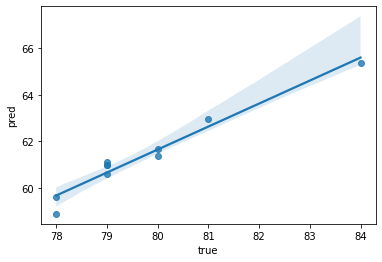

In [109]:
graph_1 = we_like_to_see(results_1)